# Analysis of Funding Received by Start-ups in India from 2018 to 2021

## 1. Business Understanding

### 1.1 Project Description
This data analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and propose the best course of action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to unearth prevailing patterns and gain insights about the opportunities in India's start-up ecosystem to inform decision-making.

### 1.2 The type of the problem
This project is of the exploratory data analytics and visualization type as it is our aim to deduce hidden insights and patterns from the available data.



## 2. Data understanding
The data used in this project was sampled from different start-up companies in India. It contains funding history for the period 2018 - 2021. The data was obtained from 4 datasets.

## 3. Data preparation
### 3.1 Installing and importing libraries

In [1]:
%pip install pyodbc  
%pip install python-dotenv 
%pip install fuzzywuzzy
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc
from dotenv import dotenv_values 

# Analysis libraries
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import re
import datetime
from datetime import datetime
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prettytable import PrettyTable
# Warning libraries
import warnings
warnings.filterwarnings('ignore')

c:\Users\hp\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### 3.2 Loading data

In [3]:
data2018 = pd.read_csv('data/startup_funding2018.csv')
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
data_2019 = pd.read_csv('data/startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [6]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [7]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query, connection)

In [8]:
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
query = "Select * from dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query, connection)

In [10]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### To guide our analysis, we have formulated 5 SMART questions:
* What is the overall trend in funding received by start-ups in India from 2018 to 2021?
* Which industries or sectors have received the highest funding during this period?
* What is the distribution of startups across the cities in India?
* What is the average funding amount received by start-ups in India during this period?
* Is there a correlation between the funding amount and the number of investors involved in funding rounds?

###  We have also developed three hypotheses for testing:
Hypothesis 1:<br>
Null: The funding received by start-ups in India has not demonstrated consistent upward trajectory over the years.<br>
Alternate: The funding received by start-ups in India has demonstrated a consistent upward trajectory over the years.

Hypothesis 2: <br>
Null: There are no significant disparities in funding received by all sectors of the Indian startups. <br>
Alternate: The technology sectors receive higher funding compared to other industries.

Hypothesis 3: <br>
Null: Situating a startup in a particular city does not influence funding.<br>
Alternate: Situating a startup in a particular city significantly affects funding.

To test these hypotheses, we will conduct the following analyses: 
* For Hypothesis 1, we will analyze the year-by-year funding amounts and calculate the average growth rate of funding.
* To investigate Hypothesis 2, we will categorize start-ups based on industry and compare the funding amounts received by each sector.
* Regarding Hypothesis 3, we will examine the distribution of start-ups across cities and deduce which cities harbour most highly-funded start-ups.

## 3.2 Data Cleaning


### 3.2.1 2018 Data

First, the 2018 data will be inspected then cleaned.

In [11]:
#Overview of the first 5 rows 
data2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [12]:
#Summary of the data
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


From the displayed summary:
* our data has no missing values
* All the columns are in string data type 

In [13]:
#defining a function that returns counts of unique values
def value(column):
    return data2018[column].value_counts()                         

In [14]:
value("Industry")

—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: Industry, Length: 405, dtype: int64

In [15]:
value("Round/Series")

Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                              8
P

In [16]:
value("Location")

Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India           1


In [17]:
value("Amount")

—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: Amount, Length: 198, dtype: int64

#### Issues arising from the data:
* The Amount column is in string data type yet it contains numerical values.
* ```_``` characters in Amount and Industry columns which indicates the values are missing.
* Some amounts have characters such as ```₹```, ```,``` ,```$```
* Industry column contains many names for one industry.

 #### Dealing with duplicates

In [18]:
#checking for duplicates
data2018.duplicated().value_counts()

False    525
True       1
dtype: int64

Our 2018 data contains one duplicate which is marked by 'True' value.

In [19]:
#print out all the duplicates next to each other
data2018[data2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [20]:
#dropping all duplicates
data2018=data2018.drop_duplicates()

In [21]:
#RECHECK IF THERE ANY DUPLICATES LEFT
data2018.duplicated().value_counts()

False    525
dtype: int64

#### Data type conversion

The ```Amount``` column is categorised as a string data type yet amount should be in integer. This is brought about by several problems in this column:
* The ```,``` ,```$``` ,```₹``` characters which should be removed.
* Also there are ```_``` characters which indicate null values.
* Some currencies are Indian rupees while others US Dollars , so for standard currency the Indian rupee will be converted to US Dollar.
* Finally, the ```Amount``` column will be converted to numeric data type.

In [22]:
#Removing ',' from the Amount column
data2018['Amount'].replace(',','', regex=True, inplace=True)
data2018['Amount'].tail(10)

516    ₹1400000000
517      ₹10000000
518              —
519        6000000
520       14900000
521      225000000
522              —
523           7500
524      ₹35000000
525       35000000
Name: Amount, dtype: object

In [23]:
#Function to convert Indian rupee currency to dollars
def convert_to_dollars(value):

    if '₹' in str(value):
        # Remove the currency symbol
        amount = value.replace('₹', '')

       # Convert to dollars using the exchange rate for 2018
        return pd.to_numeric(amount, errors='coerce') * 0.146

    elif '$' in str(value):

        return value.replace('$', '')

    elif "—" in str(value):

        return None  #  a suitable value to represent missing/invalid data

    else:

        return value

#Displays the Amount column to 1 decimal place
pd.set_option('display.float_format', '{:.1f}'.format)

data2018 = data2018.applymap(convert_to_dollars)


    
        

In [24]:
#Converting the column to a numeric data type
data2018["Amount"]=data2018["Amount"].astype(float)
data2018["Amount"].dtype

dtype('float64')

In [25]:
data2018["Amount"].head(20)

0      250000.0
1     5840000.0
2     9490000.0
3     2000000.0
4           NaN
5     1600000.0
6     2336000.0
7     7300000.0
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15   14600000.0
16     150000.0
17    1100000.0
18          NaN
19      73000.0
Name: Amount, dtype: float64

#### Data Uniformity
For data uniformity across the 4 datasets which will later make merging easier, ```Location``` and ```Industry``` columns will only remain with the first word.

In [26]:
#maintianing first word before comma in the location column
data2018["Location"] = data2018["Location"].map(lambda x: x.split(',')[0])
data2018["Location"].tail(20)

506    Bangalore
507       Mumbai
508    New Delhi
509       Mumbai
510    Bengaluru
511       Mumbai
512       Jaipur
513       Mumbai
514    New Delhi
515         Pune
516    New Delhi
517    Bengaluru
518    Ghaziabad
519    Bangalore
520    Bengaluru
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Location, dtype: object

In [27]:
#maintianing first word before comma in the industry column
data2018["Industry"] = data2018["Industry"].map(lambda x: str(x).split(',')[0])
data2018["Industry"].head(20)

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
5        Cloud Infrastructure
6                    Internet
7             Market Research
8        Information Services
9             Mobile Payments
10                        B2B
11                   Internet
12                       Apps
13              Food Delivery
14      Industrial Automation
15                 Automotive
16                    Finance
17                 Accounting
18    Artificial Intelligence
19         Internet of Things
Name: Industry, dtype: object

Earlier, it was noticed that the ```Industry``` column had '-' characters which indicate the values are missing. So the missing values are going to be replaced with ```Unknown ``` value given the column is a categorical data type.

In [28]:
#Replacing '_' with Unknown values
data2018["Industry"]=data2018["Industry"].replace('—', "Unknown", regex=True)
data2018["Industry"].head(20)

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
5        Cloud Infrastructure
6                    Internet
7             Market Research
8        Information Services
9             Mobile Payments
10                        B2B
11                   Internet
12                       Apps
13              Food Delivery
14      Industrial Automation
15                 Automotive
16                    Finance
17                 Accounting
18    Artificial Intelligence
19         Internet of Things
Name: Industry, dtype: object

####  Handling Missing values

In [29]:
#Checking for missing values 
data2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

In [30]:
#Computing summary of statistics for 2018 data
data2018.describe()

,Amount
count,377.0
mean,47244478.4
std,212692748.2
min,7500.0
25%,1000000.0
50%,3530000.0
75%,14965000.0
max,2920000000.0


The ```Amount``` column contains several missing values. Given the column is numerical, the best strategy would be to replace the missing values with the median  as it is less sensitive to outliers than the mean.

In [31]:
#Imputing missing values
array= data2018["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data2018["Amount"]=imputer.fit_transform(array)

In [32]:
#Confirming there are no more missing values
data2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

Inorder to make merging and analysis after merging easier, a column named ```Year Funded ``` which contains the respective years for the dataset will be formed.

In [33]:
data2018['Year Funded'] = 2018

Dropping columns
* The column ```About Company``` won't be needed in our analysis, it will therefore be dropped.

In [34]:
#Dropping columns
data2018.drop(['About Company'],axis=1, inplace=True)
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,Year Funded
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,2018
1,Happy Cow Dairy,Agriculture,Seed,5840000.0,Mumbai,2018
2,MyLoanCare,Credit,Series A,9490000.0,Gurgaon,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,2018
4,Eunimart,E-Commerce Platforms,Seed,3530000.0,Hyderabad,2018


### 3.3.2 2019 Data

#### Data Exploration


The exploration techniques vary for numerical, categorical, or time-series variables. Currently, 

Here we typically:

- look at example records in the dataset
- investigate the datatypes of variables in the dataset
- calculate and investigate descriptive statistics (ex: central tendencies, variability etc.)

Common steps to check the health of the data:

- Check for missing data
- Check the skewness of the data, outlier detection
- etc...

Look at Example Records

In [35]:
 # display 10 random rows from the dataset 
data_2019.sample(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
46,Rein Games,NaN,Noida,Technology,"It develops, publishes and distributes games a...","Vaibhav Gupta, Himanshu Devra, Pranav Chaudhar...",Manipal Education and Medical Group (MEMG) fam...,"$50,000,000",Pre series A
47,Ecozen,NaN,Pune,AgriTech,It develops technology-enabled products to str...,"Devendra Gupta, Prateek Singhal, Vivek Pandey",Innovation in Food & Agriculture Fund (IFA Fund),"$6,000,000",Series A
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,NaN
21,Pristyn Care,2018.0,NaN,Healthcare,Delivers advanced medical care & clinical exce...,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...","$12,000,000",Series B
73,Shadowfax,2015.0,Bangalore,Logistics,A platform for delivery services,"Abhishek Bansal, Vaibhav Khandelwal","Flipkart, Eight Roads Ventures, NGP Capital, Q...","$60,000,000",Series D
58,Origo,2010.0,Gurugram,AgriTech,It provides post-harvest management services f...,"Mayank Dhanuka, Sunoor Kaul","Oikocredit, Caspian SME Impact Fund IV, Triod...","$6,800,000",NaN
15,LivFin,2017.0,Delhi,Fintech,"Grants small business loans, supply chain fina...",Rakesh Malhotra,German development finance institution DEG,"$5,000,000",NaN
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A
67,Cuemath,2013.0,Bangalore,Edtech,It helps students to learn math online,Manan Khurma,"Manta Ray Ventures Limited, Google’s Capital G...","$5,500,000",NaN
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A


#### Data-types, completeness Information

Using the Pandas "info" function, in addition to the data-type information for the dataset, we can look at counts of available records/missing records too.

In [36]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


From the summary above:
* All data types are string except the Founded column
* There are missing values in Founded, Headquarter, Sector, Founders, Stage columns


In [37]:
# check the columns 
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

#### Data Cleaning 

To reduce code repetition, a few fuctions were created to :
* Calculate descriptive statistics of a variable
* Plot the data distribution of a variable using a histogram
* Check for missing values in a variable


In [38]:
# Function to calculate descriptive statistics of a variable
def calculate_descriptive_stats(variable):
    return variable.describe()

# Function to plot the data distribution of a variable using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Function to check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
  



#### Investigating missing Values


In [39]:
check_missing_values(data_2019)

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

#### Visualizing missing values

In [40]:
def plot_missing_values_heatmap(dataframe):
    # Creating a DataFrame indicating missing values
    missing_values = dataframe.isnull()
    # Plotting the missing values heatmap
    sns.heatmap(missing_values, cmap='viridis')
    # Setting plot properties
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    # Display the plot
    plt.show()

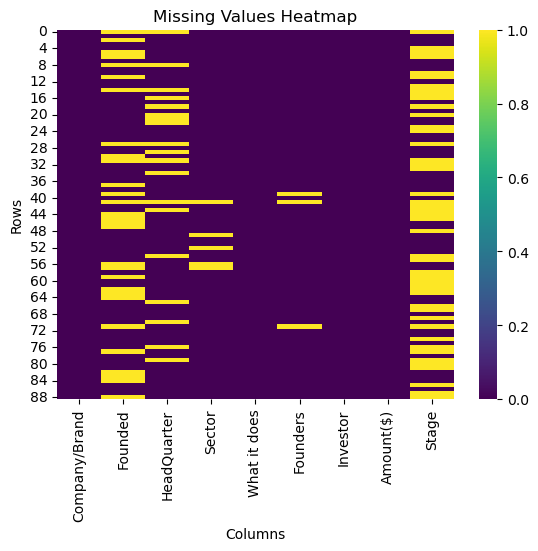

In [41]:
plot_missing_values_heatmap(data_2019)

From the heatmap, it is clearly seen that ```Stage``` column has the most missing values followed by ```Founded``` while ```Company/Brand``` , ```What it does``` and ```Investor/Amount($)``` columns have no missing values.

#### **Company column Exploration**

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Number of Company Names
- Remove leading, trailing spaces and Standardize case
- Handle missing values

Data Exploration and Descriptive Statistics

In [42]:
# Calculate the count of unique company names
unique_company_count = data_2019['Company/Brand'].nunique()
print("Count of Unique Company Names: {}".format(unique_company_count))

# Examine the most common company names
company_name_counts = data_2019['Company/Brand'].value_counts()
most_common_names = company_name_counts[company_name_counts == company_name_counts.max()]
print("\nMost Common Company Name(s):")
print(most_common_names)

Count of Unique Company Names: 87

Most Common Company Name(s):
Kratikal    2
Licious     2
Name: Company/Brand, dtype: int64


Remove leading, trailing spaces and Standardize case

In [43]:
# Remove leading and trailing spaces from the 'Company Name' column
data_2019['Company/Brand'] = data_2019['Company/Brand'].str.strip()

# standardize city name to lower case
data_2019['Company/Brand'] = data_2019['Company/Brand'].str.title()

Handle missing values

In [44]:
# Check missing values
check_missing_values(data_2019['Company/Brand'])

0

The ```Company Name``` column has no missing values.

#### **Year Founded Exploration**

Data cleaning steps:
- Validate data format
- Handle missing values
- Identifying Outliers

Handle the missing values

In [45]:
# Check missing values
check_missing_values(data_2019['Founded'])

29

The column ```Year Founded``` contains 29 missing values which will handle by replacing them with the mode.

In [46]:
# Create an instance of the SimpleImputer with the median strategy
array = data_2019['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Founded'] = imputer.fit_transform(array)

Validate data format<br>
* The column will be converted into an interger from the earlier float data type.

In [47]:
# Convert the 'Year Founded' column to integer
data_2019['Founded'] = data_2019['Founded'].astype(int)
data_2019['Founded'].head()

0    2015
1    2014
2    2015
3    2014
4    2004
Name: Founded, dtype: int32

#### **Headquarter Exploration**

Data cleaning steps:
- Remove leading, trailing spaces and Standardize case
- Handle missing values
- Number of cities
- Examine the most common cities

Remove leading, trailing spaces and Standardize case

In [48]:
# Standardize case
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].str.title()

# Remove leading and trailing spaces
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].str.strip()

Handle the missing Values

In [49]:
# Check missing values
check_missing_values(data_2019['HeadQuarter'])

19

The columns contains 19 missing values which will replace with 'Unknown' .

In [50]:
# fill the null categorical values with 'Unknown'
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna('Unknown')

Data exploration and descriptive stastistics

In [51]:
# Calculate the count of unique cities
unique_city_count = data_2019['HeadQuarter'].nunique()
print("Count of Unique Cities: {}".format(unique_city_count))

# Examine the most common cities
city_counts = data_2019['HeadQuarter'].value_counts()
most_common_cities = city_counts[city_counts == city_counts.max()]
print("\nMost Common Cities:")
print(most_common_cities)

Count of Unique Cities: 18

Most Common Cities:
Bangalore    21
Name: HeadQuarter, dtype: int64


#### **Explore Sector**

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Clean sector name
- Remove leading, trailing spaces and Standardize case
- Handle missing values

Data Exploration and Descriptive Statistics

In [52]:
# Calculate the count of unique sectors
unique_sector_count = data_2019['Sector'].nunique()
print("Count of Unique Sectors: {}".format(unique_sector_count))

# Examine the most common sectors
sector_counts = data_2019['Sector'].value_counts()
most_common_sectors = sector_counts[sector_counts == sector_counts.max()]
print("\nMost Common Sectors:")
print(most_common_sectors)

Count of Unique Sectors: 52

Most Common Sectors:
Edtech    7
Name: Sector, dtype: int64


Clean sector names

In [53]:
# cleaning sectory names
sector_replacements = {
    'AI & Tech': 'AI',
    'Ai': 'AI',
    'Automobile & Technology': 'Automobile',
    'Automotive tech': 'Automobile',
    'Automotive Tech': 'Automobile',
    'B2B Supply Chain': 'B2B',
    'E-commerce & AR': 'E-commerce',
    'E-commerce & Ar': 'E-commerce',
    'E-Commerce & Ar': 'E-commerce',
    'Ecommerce': 'E-commerce',
    'Food & Nutrition': 'Food',
    'Food & tech': 'Food',
    'Food & Tech': 'Food',
    'Food Tech': 'Food',
    'Foodtech': 'Food',
    'Games': 'Gaming',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Manufacturing': 'Industrial',
    'Marketing & Customer loyalty': 'Marketing',
    'Marketing & Customer Loyalty': 'Marketing',
    'Pharmaceutical': 'Pharma',
    'Robotics & AI': 'AI',
    'Robotics & Ai': 'AI',
    'SaaS': 'Software',
    'Safety tech': 'Security',
    'Social Media': 'SocialMedia',
    'Transport & Rentals': 'Transportation',
    'Virtual Banking': 'Banking',
    'Yoga & wellness': 'Wellness',
    'Hr Tech': "Human Resource",
    'Ai & Tech': 'AI',
}
data_2019['Sector'] = data_2019['Sector'].replace(sector_replacements)

Remove leading, trailing spaces and Standardize case

In [54]:
# Standardize case
data_2019['Sector'] = data_2019['Sector'].str.title()

# Remove leading and trailing spaces
data_2019['Sector'] = data_2019['Sector'].str.strip()

Handle missing values

In [55]:
# Check missing values
check_missing_values(data_2019['Sector'])

5

The column contains 5 missing values which will be replaced by 'Unknown' value

In [56]:
# Handle missing values
data_2019['Sector'] = data_2019['Sector'].fillna('Unknown')

#### **Explore Investor**

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Detect duplicates
- Handle missing values

Data Exploration and Descriptive Statistics

In [57]:
# Calculate the count of unique Investor names
unique_investors_count = data_2019['Investor'].nunique()
print("Count of Unique Investors: {}".format(unique_investors_count))

# Examine the most common Investors
investors_name_counts = data_2019['Investor'].value_counts()
most_common_Investors = investors_name_counts[investors_name_counts == investors_name_counts.max()]
print("\nMost Common Investor(s):")
print(most_common_Investors)

Count of Unique Investors: 86

Most Common Investor(s):
Undisclosed    3
Name: Investor, dtype: int64


Remove leading, trailing spaces and Standardize case

In [58]:
# Cleaning Investor names
data_2019['Investor'] = data_2019['Investor'].str.strip()
data_2019['Investor'] = data_2019['Investor'].str.split(',')

# Formatting Investors
data_2019['Investor'] = data_2019['Investor'].apply(lambda x: ' & '.join([str(name).strip() for name in x]))
data_2019['Investor'].head(10)

0                                 Sixth Sense Ventures
1                                     General Atlantic
2     Deepak Parekh & Amitabh Bachchan & Piyush Pandey
3    Evolvence India Fund (EIF) & Pidilite Group & ...
4             Innovation in Food and Agriculture (IFA)
5                                          Undisclosed
6    Social Capital & AngelList India & Gemba Capit...
7         Gilda VC & Art Venture & Rajeev Chitrabhanu.
8                 Multiples Alternate Asset Management
9                                             SoftBank
Name: Investor, dtype: object

Handle missing values


In [59]:
# Check missing values
check_missing_values(data_2019['Investor'])

0

The column does not contain any missing values.

#### **Explore Funding Amount**

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove and replacing empty spaces, leading and trailing spaces
- Handle missing values
- Visualize the distribution
- Detecting and removing Outliers

In [60]:

data_2019['Amount($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Amount($), Length: 89, dtype: object

Data Exploration and Descriptive Statistics

In [61]:
# Data Exploration and Descriptive Statistics
print("Descriptive Statistics:")
print(data_2019['Amount($)'].describe())
print()

Descriptive Statistics:
count              89
unique             50
top       Undisclosed
freq               12
Name: Amount($), dtype: object



Remove and replacing empty spaces, leading and trailing spaces

In [62]:
# Remove the dollar sign
data_2019['Amount($)'] = data_2019['Amount($)'].str.replace('$','').replace(',', '', regex=True)

# Cleaning the Funding Amount ($)
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

Handle Undisclosed Values

In [63]:
# handling undisclosed
data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)

In [64]:
# Create an instance of the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Amount($)'] = imputer.fit_transform(data_2019[['Amount($)']])

Detecting and removing Outliers

In [65]:
data_2019['Amount($)'].describe()

count          89.0
mean     38297002.2
std     103599437.8
min        100000.0
25%       4000000.0
50%       6000000.0
75%      26000000.0
max     693000000.0
Name: Amount($), dtype: float64

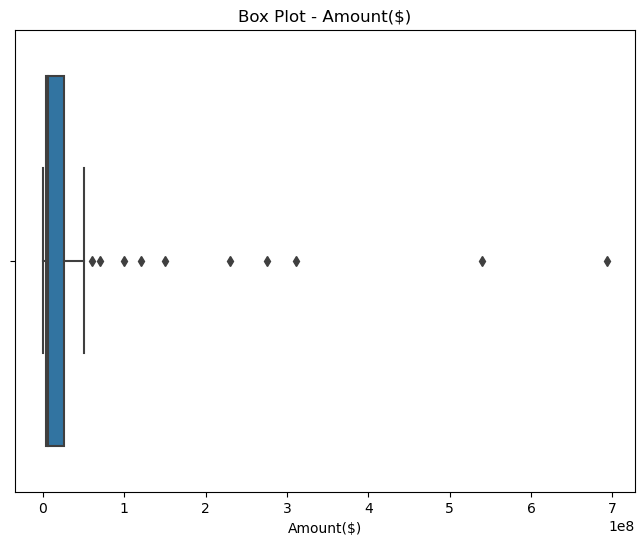

In [66]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'])
plt.title('Box Plot - Amount($)')
plt.xlabel('Amount($)')
plt.show()

#### Handle Outliers

In [67]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Amount($)')
print("Number of Outliers: {}".format(len(outliers)))
print()

# removing outliers:
data_2019 = data_2019[~data_2019['Amount($)'].isin(outliers['Amount($)'])]

# Verify if outliers were handled
outliers_after_handling = detect_outliers(data_2019, 'Amount($)')
print("Number of Outliers after Handling: {}".format(len(outliers_after_handling)))

Number of Outliers: 10

Number of Outliers after Handling: 7


After handling the outliers

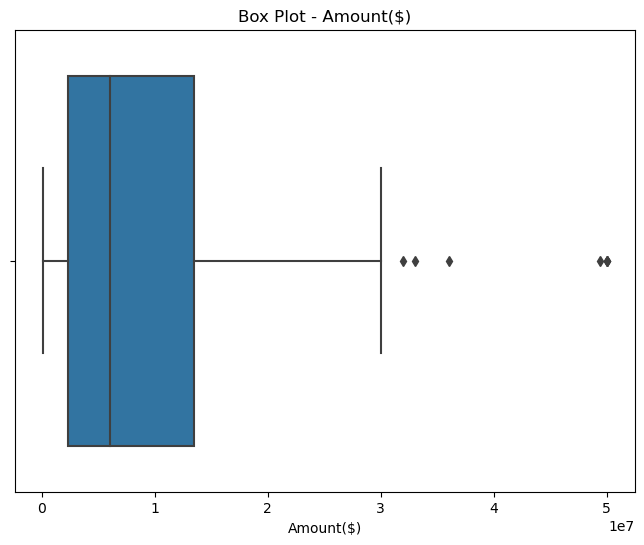

In [68]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'])
plt.title('Box Plot - Amount($)')
plt.xlabel('Amount($)')
plt.show()

In [69]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Amount($)')
print("\nNumber of Outliers reduced to: {}".format(len(outliers)))
print()


Number of Outliers reduced to: 7



#### **Explore Stage**

Clean Funding Round names

In [70]:
data_2019["Stage"].value_counts()

Series A         10
Pre series A      8
Series B          8
Series D          2
Series C          2
Fresh funding     1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

In [71]:
#cleaning Funding round names
funding_round_replacement = {
    "Fresh funding" :"Seed",
    "Seed funding":"Seed",
    "Seed fund" :"Seed",
    "Pre series A": "Pre-series A",
    "Series B+" : "Series B",
    "Seed round" :"Seed"}
data_2019['Stage'] = data_2019['Stage'].replace(funding_round_replacement)

In [72]:
data_2019["Stage"].value_counts()

Series A         10
Pre-series A      9
Series B          9
Seed              4
Series D          2
Series C          2
Post series A     1
Series E          1
Series F          1
Name: Stage, dtype: int64

#### Handle missing values

In [73]:
# Check missing values
check_missing_values(data_2019['Stage'])

40

The column contains 40 missing values which will handle by filling them in with 'Unknown' value.

In [74]:
data_2019['Stage'] = data_2019['Stage'].fillna('Unknown')

Dropping columns
- The ```What it does``` and ```Founders``` column won't be needed in our analysis therefore they will drop them.

In [75]:
#Dropping columns
data_2019.drop(['What it does', 'Founders'],axis=1, inplace=True)

**Preview after Data cleaning**

check for any missing values in the dataset



 No missing values found. Data cleaning is complete


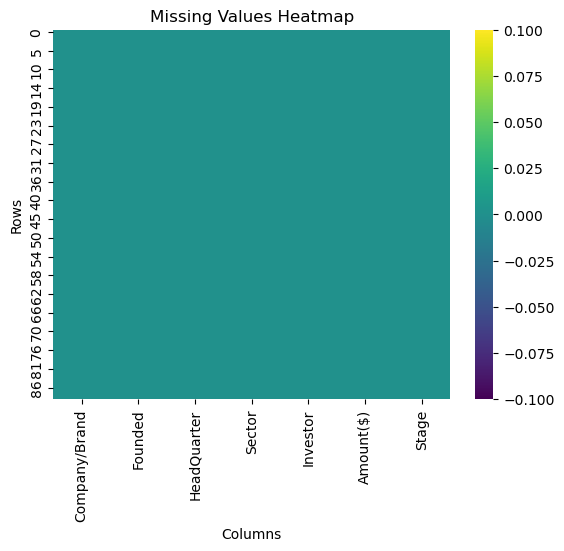

In [76]:
# check for any missing values
missing_values = data_2019.isnull().sum()
if missing_values.any():
    print("\n\nMissing values still exist in the dataset")
else:
    print("\n\n No missing values found. Data cleaning is complete")

# plot missing values
plot_missing_values_heatmap(data_2019)

#### Check for Duplicates

In [77]:
duplicates = data_2019.duplicated()
if duplicates.any():
    print("\n\nDuplicate records still exist in the dataset.")
else:
    print("\n\nNo duplicate records found. Data cleaning is complete.")




No duplicate records found. Data cleaning is complete.


In [78]:
#Creating a column named 'Year Funded'
data_2019['Year Funded'] = 2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,2015,Unknown,E-Commerce,Sixth Sense Ventures,6300000.0,Unknown,2019
2,Eduisfun,2015,Mumbai,Edtech,Deepak Parekh & Amitabh Bachchan & Piyush Pandey,28000000.0,Seed,2019
3,Homelane,2014,Chennai,Interior Design,Evolvence India Fund (EIF) & Pidilite Group & ...,30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,Agritech,Innovation in Food and Agriculture (IFA),6000000.0,Unknown,2019
5,Flytbase,2015,Pune,Technology,Undisclosed,6000000.0,Unknown,2019


#### 3.2.3  2020 Data

<h4>Data Exploration. The columns in the data are:</h4>
<div>
<li style="list-style: none;">
<ol>Company_Brand</ol>
<ol>Founded</ol>
<ol>HeadQuarter</ol>
<ol>Sector</ol>
<ol>What_it_does</ol>
<ol>Founders</ol>
<ol>Investor</ol>
<ol>Amount</ol>
<ol>Stage</ol>
<ol>column10</ol>
</li>
</div>


In [79]:
#display the columns in the dataframe
data2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [80]:
#shape of the data
data2020.shape

(1055, 10)

In [81]:
#display the summary of the data
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


From the summary above:
* All columns are string data type except ```Founded``` and ```Amount```
* All columns contain missing values except for ```Company Name``` and ```What_it_does```

In [82]:
#Overview of column 10
data2020['column10']

0       None
1       None
2       None
3       None
4       None
        ... 
1050    None
1051    None
1052    None
1053    None
1054    None
Name: column10, Length: 1055, dtype: object

In [83]:
#Overview of column 10
data2020['Founded']

0      2019.0
1      2019.0
2      2018.0
3      2020.0
4      2016.0
        ...  
1050      NaN
1051      NaN
1052   2012.0
1053   2015.0
1054   2017.0
Name: Founded, Length: 1055, dtype: float64

#### Dealing with duplicates

In [84]:
data2020.duplicated().value_counts()

False    1052
True        3
dtype: int64

The 2020 data contains 3 duplicates which will later drop

In [85]:
#print out all the duplicates next to each other
data2020[data2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [86]:
#Drop the duplicate
data2020=data2020.drop_duplicates()

#Confirming the duplicates are dealt with
data2020.duplicated().value_counts()

False    1052
dtype: int64



<h3>Decisions made:</h3>

* Change the ```Founded``` column to numerical data type.
* Drop ```column 10``` 
* Handle missing values









In [87]:
#drop the column named column 10
# Assuming data2020 is your DataFrame and 'column_name' is the column you want to drop
data2020=data2020.drop(['column10'],axis=1)
data2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


#### Handling missing values

In [88]:
#Checking missing values
data2020.isnull().sum()

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           253
Stage            462
dtype: int64

In [89]:
#Imputing missing values in the Founded column using simple imputer method with most frequest value
array= data2020["Founded"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="most_frequent")

data2020["Founded"]=imputer.fit_transform(array)



In [90]:
#Statistical summary for Amount column
data2020["Amount"].describe()

count           799.0
mean      112699397.5
std      2479695497.0
min           12700.0
25%         1000000.0
50%         3000000.0
75%        11000000.0
max     70000000000.0
Name: Amount, dtype: float64

For the ```Amount``` column the missing values will be replaced using the median since it is less sensitive to outliers than the mean.

In [91]:
#Imputing missing values in the amount column using simple imputer method
array= data2020["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data2020["Amount"]=imputer.fit_transform(array)


In [92]:
#Confirming the missing values are dealt with for the Amount and Founded column
data2020.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            462
dtype: int64

Given the other columns with missing values are catergorical, they will be replaced using "Undisclosed" value.

In [93]:
data2020=data2020.fillna("Undisclosed")
data2020.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

#### Data uniformity
There some values in the ```Stage``` column which have different casing therefore all the values will be made consistent and uniform.


In [94]:
#Overview of the Stage column
data2020["Stage"].value_counts()

Undisclosed              462
Series A                  96
Seed                      79
Seed Round                69
Series B                  57
Pre series A              54
Pre-series A              53
Series C                  50
Series D                  22
Debt                      18
Pre Series A              12
Pre-seed                  11
Seed round                 9
Bridge                     6
Series E                   6
Pre-series B               4
Series F                   4
Pre seed round             4
Angel Round                4
Pre-Seed                   2
Pre series B               2
Pre-seed Round             2
Seed funding               2
Seed Funding               2
Pre-series C               2
Series B2                  2
Pre-Series B               2
Seed Round & Series A      1
Series C, D                1
Mid series                 1
Series D1                  1
Seed Investment            1
Pre series C               1
Pre-series                 1
Bridge Round  

In [95]:
#Handling the inconsistent values 
data2020.replace({"Stage": {"Seed Round" : "Seed",
                            "Pre series A": "Pre-series A",
                            "Pre Series A" : "Pre-series A" ,
                            "Seed round" :   "Seed",
                            "Pre seed round" :"Pre-seed",
                            "Series B2" :    "Series B",
                            "Pre series B" : "Pre-series B",
                            "Seed Funding" : "Seed",
                            "Pre-Series B" : "Pre-series B",
                            "Pre-Seed"  :    "Pre-seed",
                            "Seed funding" : "Seed",
                            "Pre-seed Round" :"Pre-seed",
                            "Series E2" :     "Series E",
                            "Pre series A1" : "Pre-series A",
                            "Series D1" :     "Series",
                            "Pre seed Round" :"Pre-seed",
                            "Pre series C"  : "Pre-Series C",
                            "Bridge Round" :  "Bridge",
                            "Series A-1" :    "Series",
                            "Pre- series A":  "Pre-series A",
                            "Seed Investment" :"Seed"}},inplace =True)

In [96]:
#Confirming data uniformity
data2020["Stage"].value_counts()

Undisclosed              462
Seed                     162
Pre-series A             121
Series A                  96
Series B                  59
Series C                  50
Series D                  22
Pre-seed                  20
Debt                      18
Pre-series B               8
Series E                   7
Bridge                     7
Series F                   4
Angel Round                4
Pre-series C               2
Series                     2
Pre-series                 1
Edge                       1
Series H                   1
Seed A                     1
Seed Round & Series A      1
Pre-Series C               1
Mid series                 1
Series C, D                1
Name: Stage, dtype: int64

In the ```HeadQuarter``` column,there were locations outside India yet our analysis focuses on India .Therefore , the locations will be named outside India.

In [97]:
data2020.loc[data2020['HeadQuarter'] == 'San Francisco, California, United States', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'London, England, United Kingdom', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'San Francisco Bay Area, Silicon Valley, West Coast', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'New York, United States', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'San Francisco, United States', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Tirunelveli, Tamilnadu', 'HeadQuarter'] = 'Chennai'
data2020.loc[data2020['HeadQuarter'] == 'Tangerang, Jawa Barat, Indonesia', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'San Ramon, California ', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Frisco, Texas, United States ', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Paris, Ile-de-France, France', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Plano, Texas, United States', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Palmwoods, Queensland, Australia', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'France', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'San Ramon, California', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'San Francisco Bay Area, West Coast, Western US', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Trivandrum, Kerala, India', 'HeadQuarter'] = 'Trivandrum'
data2020.loc[data2020['HeadQuarter'] == 'Samastipur, Bihar', 'HeadQuarter'] = 'Samastipur'
data2020.loc[data2020['HeadQuarter'] == 'Irvine, California, United States', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Tumkur, Karnataka', 'HeadQuarter'] = 'Tumkur'
data2020.loc[data2020['HeadQuarter'] == 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Shanghai, China', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Jiaxing, Zhejiang, China', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Sydney, New South Wales, Australia', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'California', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Singapore', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'San Francisco', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Jaipur, Rajastan', 'HeadQuarter'] = 'Jaipur'
data2020.loc[data2020['HeadQuarter'] == 'San Franciscao', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Sydney', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Dhingsara, Haryana', 'HeadQuarter'] = 'Dhingsara'
data2020.loc[data2020['HeadQuarter'] == 'Bangaldesh', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Frisco, Texas, United States', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'New York', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Bangkok', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Seattle', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Milano, Lombardia, Italy', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Seoul', 'HeadQuarter'] = 'Outside India'
data2020.loc[data2020['HeadQuarter'] == 'Berlin', 'HeadQuarter'] = 'Outside India'




In [98]:
#Rechecking to ensure Headquarter is correctly assigned
data2020['HeadQuarter'].value_counts()

Bangalore        316
Mumbai           164
Undisclosed       94
Gurugram          79
Delhi             62
Chennai           44
Outside India     43
Pune              36
New Delhi         36
Noida             32
Hyderabad         25
Gurgaon           21
Kolkata           11
Ahmedabad         11
Haryana           10
Jaipur             9
Indore             8
Thane              5
Kochi              5
Gujarat            5
Kerala             3
Jodhpur            3
Chandigarh         3
Goa                2
Bengaluru          2
Andheri            2
Trivandrum         1
Hyderebad          1
Coimbatore         1
Banglore           1
Bhopal             1
Uttar Pradesh      1
Tamil Nadu         1
Belgaum            1
Bihar              1
Odisha             1
Warangal           1
Cochin             1
Kanpur             1
Riyadh             1
Dehradun           1
Ludhiana           1
Patna              1
Rajastan           1
Tumkur             1
Samastipur         1
Dhingsara          1
Name: HeadQua

Drooping columns
* Column ```Founders``` and ```What_it_does``` won't be needed in our analysis therefore they will be dropped.

In [99]:
#Dropping columns
data2020.drop(['Founders', 'What_it_does'],axis=1, inplace=True)

In [100]:
#Creating a column named 'year Funded'
data2020['Year Funded'] = 2020
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019.0,Chennai,AgriTech,Angel investors,200000.0,Undisclosed,2020
1,Krayonnz,2019.0,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,Undisclosed,2020
4,Gramophone,2016.0,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,Undisclosed,2020


#### 3.2.4 2021 Data

Inspect the data

In [101]:
data2021.head(10) # View first 10 rows of data2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None


In [102]:
# Get summarised info about missing values and data types of the columns in data2021

data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


From the displayed information about data2021,:

* *Founded*, *HeadQuarter*, *Founders*, *Investor*, *Amount* and *Stage* columns have some missing data
* All columns are of the object data type except *Founded* which is a float.

### Issues arising from data2021:

* Founded column is a float. It has to be a date

* Some Amounts have $undisclosed, Undisclosed and undisclosed. We may treat them as missing values

* The Amounts and Stage for FanPlay company at index 98 are interchanged

* At index 242, 256, 257, and 545, the amount appears at the investor’s column and then stage at the amount column

* Little Leap at   at index 538 has Ah! Ventures(investors) instead of amount and then amount at stage column. Also, ‘Holistic Development Programs for children in …; should be   replaced with Vishal Gupta as founder.

* BHyve company index 551 has part of ‘what_it_does’ at founders cl then founders at investor cl and investors at amount col ……. It also had investor’s name as ITO Angel Network instead of JITO Angel Network

* Some amounts are separated by ‘,’ some too have ‘$$’ preceding them and some only ‘$’ as amount…this is for EventBeep, MPL

* Amount for Godamwale at index 1148 is misspelt as 1000000\t#REF! instead of 1000000 and is at investor col with stage rather taking its place. Also, the investor is **Capt. Anand Aryamane**

* for index 1100-Sochcast company, Heaquarter is replaced with ‘Online Media\t#REF!’ and sector
* There are some duplicates

#### Resolution

* Delete duplicates
* Update misplaced values for the specifi rows and columns
* Impute with right values from credible sources where such values are mispelt or omitted
* Convert columns to right data types
* Standardise the 'Stage' column for good analysis by renaming or grouping

#### Delete Duplicates

In [103]:
# Confirm duplicated records

data2021.duplicated().sum()

19

Let's take a look, first.

In [104]:
data2021[data2021.duplicated()].head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None


Delete them

In [105]:
# Delete the duplicates and set the index

data2021 = data2021.drop_duplicates().reset_index(drop=True)

In [106]:
# Check if duplicates were dropped

data2021.shape

(1190, 9)

Swap values interchanged

In [107]:
# A function to swap vulues un specif columns

def swap_values(df, row_index, column1, column2):
    """
    Swaps the values of two specific columns in a DataFrame for a given row index.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be swapped.
        column1 (str): The name of the first column.
        column2 (str): The name of the second column.

    Returns:
        pd.DataFrame: The DataFrame with the swapped values.
    """
    df_modified = df.copy()
    value1 = df_modified.at[row_index, column1]
    value2 = df_modified.at[row_index, column2]
    df_modified.at[row_index, column1] = value2
    df_modified.at[row_index, column2] = value1
    return df_modified


In [108]:
# Apply function to swap Amount and Stage cols

data2021 = swap_values(data2021, 98 , 'Amount', 'Stage')
data2021 = swap_values(data2021, 655 , 'Amount', 'Stage')

#### Update misplaced values

We now update values wrongly placed or mispelt

In [109]:
# A function to update values in specific columns and rows

def update_values(df, row_index, column_values):
    """
    Updates multiple values in a DataFrame for a specific row.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be updated.
        column_values (dict): Dictionary where keys are column names and values are the new values.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    for column, value in column_values.items():
        df_modified.at[row_index, column] = value
    return df_modified



In [110]:
# Apply function to specific rows and columns

data2021 = update_values(data2021, 237, column_values={'Investor': 'Unknown', 'Amount': '$22000000', 'Stage': 'Series C'})

data2021 = update_values(data2021, 238, column_values={'HeadQuarter':'Gurugram', 'Investor': 'Unknown', 'Amount': '$5000000', 'Stage': 'Seed'})

data2021 = update_values(data2021, 526, column_values={'Investor': 'Unknown', 'Amount': '$1000000', 'Stage': 'Pre-series A'})

data2021 = update_values(data2021, 532, column_values={'Founders': 'Omkar Pandharkame, Ketaki Ogale' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 658, column_values={'Founders': 'Sushil Agarwal' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$1000000', 'Stage': 'Venture-Series Unknown'})

# data2021 = update_values(data2021, 1100, column_values={'HeadQuarter': 'Bangalore' ,'Investor': ' VINNERS, Raj Nayak, Viacom18 Media, Amritaanshu Agrawal, Mirabaud', 'Amount': '$Undisclosed', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 519, column_values={'Founders': 'Vishal Gupta' ,'Investor': 'ah! Ventures', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 1148, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})


data2021 = update_values(data2021, 1129, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})

In [111]:
# Check just by one example

data2021.iloc[[1148]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Coutloot,2016.0,Mumbai,Consumer Services,Empowering local markets to sell online social...,"Mahima Kaul, Jasmeet Thind",Capt. Anand Aryamane,$1000000,Seed


#### Company_Brand column

In [112]:
# Get unique values with their frequencies of the comapany_brand column

data2021['Company_Brand'].value_counts()


BharatPe            8
BYJU'S              4
Teachmint           3
OYO                 3
Captain Fresh       3
                   ..
SP Robotic Works    1
3SC                 1
Chai Waale          1
Minimalist          1
WeRize              1
Name: Company_Brand, Length: 1033, dtype: int64

Same company name was treated as separate identities: BYJU’S and  BYJU'S. <br>This might be due to the different apostrophies used.

........let's check!

In [113]:
# Check if they are same

"BYJU'S" ==  'BYJU’S'


False

In [114]:
# Good! Now we correct that and that's all for company_Brand

data2021['Company_Brand'] = data2021['Company_Brand'].str.replace("’", "'")

In [115]:
data2021['Company_Brand'].nunique() #Checking...

1032

In [116]:
# Get summary info, number of unique values and the values of the 'HeadQuarter' column

print(f"{data2021.info()}\n")
print(f"{data2021['HeadQuarter'].nunique()}\n")
print(f"{data2021['HeadQuarter'].value_counts()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1188 non-null   object 
 8   Stage          772 non-null    object 
dtypes: float64(1), object(8)
memory usage: 83.8+ KB
None

69

Bangalore      421
Mumbai         198
Gurugram       155
New Delhi      142
Pune            46
              ... 
Faridabad        1
Roorkee          1
Ambernath        1
Panchkula        1
Gandhinagar      1
Name: HeadQuarter, Length: 69, dtype: int64



There sure have been wrong placement for 'Information Technology & Services' and  'Food & Beverages' <br>
Let's check that out!

In [117]:
# Checking .....

data2021[data2021['HeadQuarter'] == 'Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
236,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [118]:
# Placing them correctly for MasterChow using the update_value function

data2021 = update_values(data2021, 236, column_values={'HeadQuarter': 'New Delhi', 'Sector': 'Food & Beverages'})

In [119]:
# Checking .....

data2021[data2021['HeadQuarter'] == 'Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [120]:
# Checking for Peak

data2021[data2021['HeadQuarter'] == 'Information Technology & Services']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1157,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [121]:
# Placing them correctly

data2021 = update_values(data2021, 1157, column_values={ 'HeadQuarter': 'Manchestor', 'Sector': 'Information Technology & Services'})

In [122]:
# Checking ......

data2021[data2021['HeadQuarter'] == 'Information Technology & Services']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


Deal with Missing Values

In [123]:
# Check for missing values

data2021[data2021['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
29,Vidyakul,2018.0,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed


In [124]:
# Fill the missing value with its correct value 'Gurgaon'ArithmeticError
data2021 = update_values(data2021, 29, column_values={'HeadQuarter': 'Gurgaon'})

#### Dealing with the 'Founded' Col

In [125]:
# Getting the unique values of the 'Founded' column

data2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [126]:
# Checking the number of missing values

data2021['Founded'].isnull().sum()

1

In [127]:
# Get statistical summaries of the column to inform 
# what strategy to use for imputation

data2021['Founded'].describe()

count   1189.0
mean    2016.6
std        4.5
min     1963.0
25%     2015.0
50%     2018.0
75%     2020.0
max     2021.0
Name: Founded, dtype: float64

In [128]:
# Check data type 


data2021['Founded'].dtype

dtype('float64')

Now, we can do imputation. <br> Since 'year' is a categorical data here, we use the most frequent to fill the null.

In [129]:
# Imputing missing values

array = data2021['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

data2021['Founded'] = imputer.fit_transform(array)

In [130]:
data2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011., 2009., 2002.,
       1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991., 1984.,
       2004., 2005., 1963.])

Converting 'Founded' from float to int64

In [131]:
# Founded column converted to int

data2021['Founded'] = data2021['Founded'].astype(int)
data2021['Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Founded, dtype: int32

In [132]:
# Making sure the conversion was done

data2021['Founded'].dtype

dtype('int32')

In [133]:
# Get unique values

data2021['Founded'].unique()

array([2019, 2015, 2012, 2021, 2014, 2018, 2016, 2020, 2010, 2017, 1993,
       2008, 2013, 1999, 1989, 2011, 2009, 2002, 1994, 2006, 2000, 2007,
       1978, 2003, 1998, 1991, 1984, 2004, 2005, 1963])

#### Cleaning the 'Amount' col

In [134]:
# Inspecting unique values with their frequencies

data2021['Amount'].value_counts()

$Undisclosed      72
$1000000          54
Undisclosed       43
$2000000          40
$1,000,000        33
                  ..
$1,000,000,000     1
$18,000,000        1
$5,200,000         1
$1,400,000         1
$55000000          1
Name: Amount, Length: 271, dtype: int64

Replacing Undisclosed/$undisclosed/$Undisclosed values under the 'Amounts' Column

In [135]:
# Function to replace anomalous amount values with np.nan

def replace_values_with_nan(df, column_name, values_to_replace):
    """
    Replaces specified values in a column of a DataFrame with np.nan.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to modify.
        column_name (str): The name of the column to replace values in.
        values_to_replace (list or scalar): The value(s) to replace with np.nan. Can be a single value or a list of values.

    Returns:
        pandas.DataFrame: A modified DataFrame with the specified values replaced by np.nan.

    Example:
        # Create a sample DataFrame
        data = {
            'Column1': [1, 2, 3, 4, 5],
            'Column2': ['A', 'B', 'C', 'D', 'E'],
            'Column3': ['X', 'Y', 'Z', 'X', 'Z']
        }

        df = pd.DataFrame(data)

        # Define the column name and values to replace with np.nan
        column_name = 'Column3'
        values_to_replace = ['X', 'Z']

        # Call the replace_values_with_nan function
        df_modified = replace_values_with_nan(df, column_name, values_to_replace)

        # Print the modified DataFrame
        print(df_modified)
    """
    df[column_name] = df[column_name].replace(values_to_replace, np.nan)
    return df


In [136]:
# Invoking the function to replace the missing values with np.nan

data2021 = replace_values_with_nan(data2021, 'Amount', ['$Undisclosed', '$undisclosed', 'undisclosed', 'Undisclosed', 'None'])

# Replacing the undesired characters

data2021['Amount'] = data2021['Amount'].str.replace('[$,]', '')

In [137]:
# Converting the 'Amount' col to float

data2021['Amount'] = pd.to_numeric(data2021['Amount'])
data2021['Amount'].dtype

dtype('float64')

In [138]:
# Make scientific numbers display as normal with i decimal point

pd.set_option('display.float_format', '{:.1f}'.format)


In [139]:
# Get statistical summary of data2021

data2021.describe()

,Founded,Amount
count,1190.0,1049.0
mean,2016.6,171212131.6
std,4.5,4631144962.5
min,1963.0,10000.0
25%,2015.0,1000000.0
50%,2018.0,3500000.0
75%,2020.0,15000000.0
max,2021.0,150000000000.0


Filling missing values in the 'Amount' Col

In [140]:
# Imputing missing values

array = data2021['Amount'].values.reshape(-1,1) # simpleImputer takes 2d array as input
imputer = SimpleImputer(strategy='median')   # Chose 'median' strategy because of the presence of outliers

data2021['Amount'] = imputer.fit_transform(array)

In [141]:
# View first 5 rows of data2021

data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


Get Outliers and Remove them

In [142]:
def get_outlier(data, column):
    """
    Function that identifies outliers from the dataframe

    Args:
        data : pandas dataframe
            Contains the data where the outliers are to be found
        column : str
            Usually a string with the name of the column
    
    Returns:
        None: prints number of outliers 
    """
    
    # calculate interquartile range
    q25, q75 = np.percentile(data2021['Amount'], 25), np.percentile(data2021['Amount'], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    indx = np.where((data2021['Amount'] < lower) | (data2021['Amount'] > upper))
    print('Identified outliers: %d' % len(indx[0]))
    
  

In [143]:
# Call the function remove_outlier()

get_outlier(data2021, 'Amount')

Percentiles: 25th = 1000000.000, 75th = 11000000.000, IQR = 10000000.000
Identified outliers: 203


Since outliers are 203 representing almost 10% of our data, we choose to ignore them.

#### Cleaning the *'Stage'* Column

Inspecting the unique values in the 'Stage' Column

In [144]:
data2021['Stage'].unique() # Get unique values of Stage column

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Check how many records have the null value at the 'Stage' column

In [145]:
data2021['Stage'].isnull().sum()  # Get the numer of missing values in Stage

418

Oops! Pretty much! Let's take a deeper look at those records.

In [146]:
data2021[data2021['Stage'].isnull()].head() # View first 5 rows whose stage column are null

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None
5,Urban Company,2014,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000.0,None
6,Comofi Medtech,2018,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000.0,None
8,Vitra.ai,2020,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,3500000.0,None
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,None


Alright! These companies are listed on cruchbase, the leading provider of private-company prospecting and research solutions. <br>
Let's see if we can get reliable data to fill-in the nulls

In [147]:
# A function to update multiple rows and columns with values

def update_values_(df, row_indices, column_index, values):
    """
    Updates multiple values in a DataFrame for specific rows and a specific column.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_indices (list): Indices of the rows where the values will be updated.
        column_index (int or str): Index or name of the column where the values will be updated.
        values (list): List of new values to be assigned to the specified cells.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    column_index = df.columns.get_loc(column_index) if isinstance(column_index, str) else column_index

    for i, row_index in enumerate(row_indices):
        df_modified.iloc[row_index, column_index] = values[i]

    return df_modified


In [148]:
# Define row_indices, column_index, values to be passed to the function update_values_() to insert values

row_indices = [1,5,6,8,11,13,14,15,16,24,31,34,35,36,37,40,42,46]
column_index = 8
values = ['Venture - Series Unknown','Secondary Market', 'Pre-Seed','Seed', 'Venture - Series Unknown','Pre-Seed',\
         'Series A', 'Series D','Series E','Series A','Debt','Series A','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Series A', 'Seed','Equity Crowdfunding']
data2021 = update_values_(data2021, row_indices, column_index, values)

Good! I could just get a few. 

Let's have a look at what the unique values are again.

In [149]:
data2021['Stage'].unique()  # Get unique values of stage column again

array(['Pre-series A', 'Venture - Series Unknown', 'Series D', 'Series C',
       'Seed', 'Secondary Market', 'Pre-Seed', None, 'Series A',
       'Series E', 'Series B', 'Pre-seed', 'Debt', 'Pre-series B',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Ok, Let's put these values in a standard format.

In [150]:
# Function to replace or group the funding rounds



def update_value(value):
    """
    Update the given value based on predefined replacements specific to the 'Stage' column.

    Args:
        value (str): The value to be updated.

    Returns:
        str: The updated value.
    """
    replacements = {
        r'Pre series|Early seed|Pre-series A|Pre-series A1': 'Pre-series',
        r'Seies A|Seed+|Pre-series B|Series A2': 'Series A',
        r'PE': 'Private Equity',
        r'Debt': 'Debt Financing',
        r'Seed1': 'Seed',
        r'None': 'Venture - Series Unknown',
        r'Series A+|Series B3| Series B': 'Series B',
        r'Series F2|Series F1|Series D1|Series D|Series G|Series H|Series I|Series E|Series F': 'Series C',
    }

    for pattern, replacement in replacements.items():
        value = re.sub(pattern, replacement, str(value))

    return value


# Apply the function to the 'Stage' column of the DataFrame
data2021['Stage'] = data2021['Stage'].apply(update_value)


Great! Checking........

In [151]:
# Check the unique values of the stage column

data2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Pre-Series B', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Series B+', 'Private Equity', 'Pre-series1',
       'Venture-Series Unknown'], dtype=object)

Ouch!  'Series B+',  'Pre-Series B' and 'Pre-series1' want to be treated diferently! I see. Let's implore another method!

In [152]:
# Replace values

data2021['Stage'].replace('Series B+', 'Series B', inplace=True)
data2021['Stage'].replace('Pre-series1', 'Pre-series', inplace=True)
data2021['Stage'].replace('Pre-Series B', 'Series A', inplace=True)
data2021['Stage'].replace(' Series B', 'Series B', inplace=True)


Nice! Let's take a look at the unique values for stage column again!

In [153]:
# Get unique valaues of the stage column again

data2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Series A', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Private Equity', 'Venture-Series Unknown'],
      dtype=object)

#### Investor Column <br>

Inspecting the unique instances of the 'Investor Column'

In [154]:
data2021['Investor'].value_counts()

Inflection Point Ventures                23
Venture Catalysts                        11
Tiger Global                             11
Elevation Capital                         7
We Founder Circle                         6
                                         ..
CDC Group, Aavishkaar Venture Capital     1
GSF, Pras Hanuma                          1
Ajat Hukkoo, Piyush Chaplot               1
Mumbai Angels, Amitesh Pandey             1
3one4 Capital, Kalaari Capital            1
Name: Investor, Length: 931, dtype: int64

NO anomaly spotted here, good! Let's now separate and keep first names......nooooo....wait! <br>

..before that I just saw 'http://100x.vc/' and '2000000' as an investor. Let's check that out!

In [155]:
# Get the row/rows that have 'http://100x.vc/' as investor

data2021[(data2021['Investor'] == 'http://100x.vc/')|(data2021['Investor'] == '2000000')]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,http://100x.vc/,2500000.0,Series B
883,EyeMyEye,2021,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series


Alright, let's dig deeper by clicking the link.......Ohh, I got it! The Investor is a company named '100x.vc' <br>

Making the change........

In [156]:
# Slice that value and asign '100x.vc'

data2021.at[59, 'Investor'] = '100x.vc'
data2021.at[877, 'Investor'] = 'LetsVenture'

In [157]:
# Checking..........
data2021[(data2021['Investor'] == '100x.vc')|(data2021['Investor'] == 'LetsVenture')]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,100x.vc,2500000.0,Series B
877,Vayana Network,2017,Pune,Financial Services,Vayana Network is an electronic network that c...,Ramaswamy Iyer,LetsVenture,30000000.0,Series C
947,Trica,2021,Mumbai,Equity Management,Powering private markets - A technology platfo...,Nimesh Kampani,LetsVenture,3000000.0,Series B


Good! What next?............ Let's now clean by retaining only the first

In [158]:
# Splitting the names separated by ',' and keeping the first

data2021["Investor"] = data2021["Investor"].map(lambda x: str(x).split(',')[0])


In [159]:
data2021['Investor'].value_counts()

None                         61
Inflection Point Ventures    28
Venture Catalysts            23
Tiger Global                 19
Titan Capital                16
                             ..
Octahedron Capital            1
Amit Singhal                  1
Satish Grampurohit            1
Ecom Express                  1
Winter Capital                1
Name: Investor, Length: 669, dtype: int64

In [160]:
# Get the investor named '2000000'ArithmeticError
data2021[data2021['Investor']== '2000000']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
883,EyeMyEye,2021,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series


In [161]:
# Let's update the value

data2021 = update_values(data2021, 883, column_values={'Investor': 'Nueva Capital'})

Done!.............let's check further for missing values

In [162]:
data2021[data2021['Investor']== 'None'] # Check rows that are 'None' at the 'Investor' column

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,Venture - Series Unknown
30,Jambox Games,2021,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,None,1100000.0,Series B
42,LearnVern,2016,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",None,1000000.0,Series B
45,moEVing,2021,Gurugram,Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,None,1000000.0,Series B
46,WeWork India,2017,Bangalore,Hospitality,"Transform buildings into beautiful, collaborat...",Karan Virwani,None,26000000.0,Series B
...,...,...,...,...,...,...,...,...,...
1061,EV Plugs,2021,Gurugram,Information Technology & Services,EV charging station aggregator platform,"Manish Narang, Kapil Narang, Ashwani Arora",None,150000.0,Venture - Series Unknown
1069,Nimble Growth Organics,2016,Bangalore,Farming,Nimble Growth Organics is the new age Agri sta...,"Rahul Saria, Nagendra Kalkuli, Abhisek Bhagcha...",None,3500000.0,Series B
1154,moneyHOP,2018,London,Financial Services,moneyHOP is India’s first cross-border neo bank.,Mayank Goyal,None,1200000.0,Series B
1155,Codingal,2020,Bangalore,EdTech,Codingal is on a mission to inspire school kid...,"Vivek Prakash, Satyam Baranwal",None,1200000.0,Series B


Update the values from 'None' to 'Unknown'

In [163]:
# Change 'None' to 'Unknown'
data2021.loc[data2021['Investor'] == 'None', 'Investor'] = 'Unknown'


In [164]:
# Check 

data2021.Investor.value_counts()

Unknown                      64
Inflection Point Ventures    28
Venture Catalysts            23
Tiger Global                 19
Titan Capital                16
                             ..
Octahedron Capital            1
Amit Singhal                  1
Satish Grampurohit            1
Ecom Express                  1
Winter Capital                1
Name: Investor, Length: 668, dtype: int64

In [165]:
# Get the number of null values in the investor column
data2021['Investor'].isnull().sum()

0

In [166]:
data2021['Sector'].head(10)

0        AI startup
1            EdTech
2            EdTech
3    B2B E-commerce
4           FinTech
5     Home services
6        HealthTech
7        HealthTech
8      Tech Startup
9        E-commerce
Name: Sector, dtype: object

Dropping columns
* The ```Founders``` and ```Company Description``` won't be needed in the analysis therefore they will be dropped.

In [167]:
# Drop the 'Founders' and 'Company Description' column and introduce another column.....year_funded

data2021.drop(['Founders','What_it_does'], axis=1, inplace=True)

data2021['Year Funded'] = 2021
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019,Bangalore,AI startup,BEENEXT,1200000.0,Pre-series,2021
1,upGrad,2015,Mumbai,EdTech,Unilazer Ventures,120000000.0,Venture - Series Unknown,2021
2,Lead School,2012,Mumbai,EdTech,GSV Ventures,30000000.0,Series C,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,CDC Group,51000000.0,Series C,2021
4,FypMoney,2021,Gurugram,FinTech,Liberatha Kallat,2000000.0,Series B,2021


In [168]:
#Rechecking to ensure there are no missing values
data2021.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
Investor         0
Amount           0
Stage            0
Year Funded      0
dtype: int64

#### Merging datasets
**Renaming columns**

In [169]:
#Print all the column names
print(f'2018: {data2018.columns}\n\n\
        2019: {data_2019.columns}\n\n\
        2020: {data2020.columns}\n\n\
        2021: {data2021.columns}')

2018: Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'Year Funded'],
      dtype='object')

        2019: Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount($)', 'Stage', 'Year Funded'],
      dtype='object')

        2020: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')

        2021: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')


In [170]:
#Renaming columns
data2018.rename(columns={'Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter'},inplace=True)

data_2019.rename(columns={'Company/Brand':'Company Name','Amount($)':'Amount'},inplace=True)

data2020.rename(columns={'Company_Brand':'Company Name'},inplace=True)

data2021.rename(columns={'Company_Brand':'Company Name'},inplace =True)

In [171]:
#Confirming company names
print(f'2018: {data2018.columns}\n\n\
        2019: {data_2019.columns}\n\n\
        2020: {data2020.columns}\n\n\
        2021: {data2021.columns}')

2018: Index(['Company Name', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'Year Funded'],
      dtype='object')

        2019: Index(['Company Name', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')

        2020: Index(['Company Name', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')

        2021: Index(['Company Name', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')


Since the dataset 2018 does not have the ```Investor``` column ,the column wil be equated to 'Unknown' in the 2018 dataset

In [172]:
data2018['Investor'] = 'Unknown'
data2018.head()

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,2018,Unknown
1,Happy Cow Dairy,Agriculture,Seed,5840000.0,Mumbai,2018,Unknown
2,MyLoanCare,Credit,Series A,9490000.0,Gurgaon,2018,Unknown
3,PayMe India,Financial Services,Angel,2000000.0,Noida,2018,Unknown
4,Eunimart,E-Commerce Platforms,Seed,3530000.0,Hyderabad,2018,Unknown


In [173]:
#Concating the datasets
df = pd.concat([data2018, data_2019, data2020, data2021], ignore_index=True)
df.sample(20)

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor,Founded
316,Nua,Consumer Goods,Seed,3530000.0,Mumbai,2018,Unknown,NaN
354,Hospals,Medical,Seed,1500000.0,New Delhi,2018,Unknown,NaN
2278,Junio,FinTech,Series B,600000.0,New Delhi,2021,Amit Lakhotia,2020.0
2380,Tilt,Bike Rental,Venture - Series Unknown,125000.0,Bangalore,2021,Y Combinator,2016.0
1182,GigIndia,Tech,Pre-series A,971000.0,Pune,2020,Incubate Fund India,2017.0
707,Quintype,Content management,Series A,3500000.0,Bangalore,2020,IIFL AMC,2014.0
1901,Juspay,FinTech,Series C,60000000.0,Bangalore,2021,SoftBank Vision Fund 2,2012.0
2189,Indi Energy,Renewables & Environment,Series B,3500000.0,Roorkee,2021,Mumbai Angels Network,2019.0
839,GoodGamer,Gaming,Seed,2500000.0,Bangalore,2020,Undisclosed,2020.0
472,Avenues Payments India Pvt. Ltd.,None,Corporate Round,1300000.0,Mumbai,2018,Unknown,NaN


In [174]:
#Preview the data
print(df.shape,"\n")
print(df.info())

(2846, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2846 non-null   object 
 1   Sector        2846 non-null   object 
 2   Stage         2846 non-null   object 
 3   Amount        2846 non-null   float64
 4   HeadQuarter   2846 non-null   object 
 5   Year Funded   2846 non-null   int64  
 6   Investor      2846 non-null   object 
 7   Founded       2321 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 178.0+ KB
None


From the summary above:
* Only the ```Founded``` column has missing values.
* ```Amount```,```Year Funded``` and ```Founded``` columns are numerical data types while the rest are string.


#### Dealing with duplicates

In [175]:
df.duplicated().value_counts()

False    2843
True        3
dtype: int64

Our combined dataset contains 3 duplicates.

In [176]:
#print out all the duplicates next to each other
df[df.duplicated(keep=False)]

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor,Founded
1503,Yolo,Transport,Seed,600000.0,Gurugram,2020,Undisclosed,2019.0
1565,Yolo,Transport,Seed,600000.0,Gurugram,2020,Undisclosed,2019.0
1988,Siply,FinTech,Series B,1000000.0,Bangalore,2021,Inflection Point Ventures,2020.0
2053,Siply,FinTech,Series B,1000000.0,Bangalore,2021,Inflection Point Ventures,2020.0
2610,Ola Electric,Automotive,Venture - Series Unknown,200000000.0,Bangalore,2021,Falcon Edge,2017.0
2713,Ola Electric,Automotive,Venture - Series Unknown,200000000.0,Bangalore,2021,Falcon Edge,2017.0


In [177]:
#dropping all duplicates
df=df.drop_duplicates()

In [178]:
#RECHECK IF THERE ANY DUPLICATES LEFT
df.duplicated().value_counts()

False    2843
dtype: int64

#### Data cleaning

A closer inspection of all the columns shows that there are misplaced values in the ```Sector``` and ```Stage``` column .

In [179]:
#Viewing misplaced values
df[(df["Sector"] == "Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience") | 
(df["Sector"] == "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.") | 
(df["Stage"] == "https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593") |
(df["Sector"] == "Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.")]

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor,Founded
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000.0,Bangalore,2018,Unknown,NaN
1893,Fullife Healthcare,Primary Business is Development and Manufactur...,Series C,22000000.0,Pharmaceuticals\t#REF!,2021,Unknown,2009.0
1894,MoEVing,MoEVing is India's only Electric Mobility focu...,Series B,5000000.0,Gurugram,2021,Unknown,2021.0
2737,Sochcast,Sochcast is an Audio experiences company that ...,Venture - Series Unknown,3500000.0,Online Media\t#REF!,2021,$Undisclosed,2020.0


Given that that also the ```HeadQuarter``` is misplaced in the same rows,we shall do away with the rows.

In [180]:
#Dropping misplaced values
df= df.drop(labels=[178,1893,1894,2737], axis=0)

**Cleaning Sector column**<br>
The column was cleaned in reference to this [article](https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-) which contains several industries and their standard sector name.

In [181]:
df.replace({"Sector": {"Fintech":"FinTech",
                        "Agritech" :"AgriTech",
                        "Computer software" :"Software",
                       "E-Learning" :"E-learning",
                       "IoT":"Internet of Things",
                       "Health":"Health Care",
                       "Apparel & Fashion" :"Fashion",
                       "Gaming startup":"Gaming",
                       "BioTechnology":"Biotechnology",
                       "sports":"Sports",
                       "LegalTech":"Legal Tech",
                       "Fitness startup":"Fitness",
                       "Venture capitalist":"Venture Capital",
                       "Apparel & Fashion" :"Fashion",
                        "Blockchain startup":"Blockchain",
                       "HR Tech":"HR tech",
                       "Food tech":"FoodTech",
                       "Crypto":"Cryptocurrency",
                       "Automobiles":"Automobile",
                       "CleanTech":"Cleantech",
                       "Job portal" :"Online Portals",
                       "Edtech | EdTech Startup":"EdTech",
                       "Healthcare |Healthtech|HealthCare |HealthTech|Hospital & Health Care|Heathcare|Health care" :"Health Care",
                       "AI startup|AI|Ai":"Artificial Intelligence",
                       "Health, Wellness & Fitness|Health & Wellness" :"Wellness",
                       "Tech company|Technology" :"Tech",
                       "IT|IT startup":"Information Technology",
                       "Food Industry|Food & Bevarages|Beverage |Beverages|Food and Beverages":"Food & Beverage",
                       "B2B service|B2B marketplace":"B2B",
                        "E-Commerce|Ecommerce|Social e-commerce":"E-commerce"

                       }},inplace =True)

In [182]:
# pd.set_option("max_rows",None)
df["Sector"].value_counts().sum()

2839

In [183]:
global_sector=pd.read_csv('data\global_ind.csv',delimiter=',')
global_sector.dropna(inplace=True)
global_sector.columns

Index(['Industry Group', 'Industries'], dtype='object')

In [184]:
# Create a new column named "global_sector" in the df DataFrame
df["global_sector"] = ""

# Loop through each row in the df DataFrame
for index, row in df.iterrows():
    sector = row["Sector"]
    
    # Find the best match for the sector value using fuzzy matching
    matches = process.extractOne(sector, global_sector["Industries"])
    
    # If a match is found with a similarity score of 50% or higher, assign the corresponding global industry value to the "global_sector" column in df DataFrame
    if matches[1] >= 49.9:
        global_sector_val = global_sector.loc[matches[2], "Industry Group"]
        df.at[index, "global_sector"] = global_sector_val

# Print the updated df DataFrame
df.sample(20)


#Saving the Dataframe as an excel sheet
df.to_excel('complete_dataset.xlsx', sheet_name='Sheet1',index=False)


Cleaning is done for the sector column! Let's take a look at the first five rows.

In [185]:
# Get 10 random rows of the dataset.

df.sample(10)

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor,Founded,global_sector
1208,Big Bang Boom Solutions,Defense tech,Series A,1000000.0,Chennai,2020,Mumbai Angels Network,2018.0,Administrative Services
2455,Wysa,AI company,Series B,5000000.0,Bangalore,2021,W Health Ventures,2015.0,Artificial Intelligence
761,BitClass,PaaS startup,Seed,2000000.0,Bangalore,2020,"AET Japan, Figure Eight Investments, Waterbrid...",2020.0,Artificial Intelligence
2015,Saveo,HealthTech,Series B,4000000.0,Bangalore,2021,Matrix Partners India,2019.0,Health Care
278,Poshmiles Online Solutions Private Limited,Travel,Seed,3530000.0,Bengaluru,2018,Unknown,NaN,Transportation
1510,CamCom,AI & Deep learning,Undisclosed,3000000.0,Bangalore,2020,"Triton Investment Advisors,",2017.0,Artificial Intelligence
917,Infurnia,Tech Startup,Undisclosed,240000.0,Bangalore,2020,"Pallav Nadhani, Idein Ventures",2014.0,Administrative Services
1933,SK Finance,Financial Services,Series C,53000000.0,Jaipur,2021,IIFL Wealth,1994.0,Administrative Services
2659,BookingJini,Hospitality,Pre-series,1200000.0,Gurugram,2021,Mumbai Angels Network,2017.0,Travel and Tourism
830,Ahaguru,Edtech,Series A,3000000.0,Chennai,2020,Anand Mahindra,2012.0,Education


#### **UNIVARIATE ANALYSIS**

Univariate analysis is a component of exploratory data analysis (EDA) that focuses on examining and interpreting individual variables in isolation. 

Its purpose is to analyze the characteristics, patterns, and distribution of a single variable in order to gain insights and comprehend its behavior within a dataset. 

By scrutinizing a variable independently, researchers can uncover valuable information about its properties without considering the influence of other variables.

#### **Company Name**

To explore the 'Company Name' column of the data, we first want to get some statistical summaries using the .describe() method in pandas.

In [186]:
# Get some statistical summaries about the column.

df['Company Name'].describe()

count         2839
unique        2212
top       BharatPe
freq            10
Name: Company Name, dtype: object

From the displayed statistics, the total count of companies in the entire dataset is 2846 out of which 2216 are unique.

Also, the most frequent company is **BharatPe** with 10 occurances. This means BharatPe was able to obtain 10 multiple fundings spanning through 2018 to 2021.

Let's take a more closer look for confirmation that the 10 occurances were not duplicates.

In [187]:
# Get the dataframe of companies named BharatPe

df.loc[df['Company Name'] == 'BharatPe']

,Company Name,Sector,Stage,Amount,HeadQuarter,Year Funded,Investor,Founded,global_sector
1489,BharatPe,FinTech,Series C,75000000.0,Delhi,2020,Ribbit Capital,2018.0,Financial Services
1562,BharatPe,FinTech,Undisclosed,100000000.0,Delhi,2020,Coatue Management,2018.0,Financial Services
1795,BharatPe,FinTech,Debt Financing,20000000.0,New Delhi,2021,IIFL Wealth,2018.0,Financial Services
1837,BharatPe,FinTech,Series C,370000000.0,New Delhi,2021,Tiger Global,2018.0,Financial Services
1976,BharatPe,FinTech,Series C,100000000.0,New Delhi,2021,Amplo,2018.0,Financial Services
2038,BharatPe,FinTech,Debt Financing,6000000.0,New Delhi,2021,InnoVen Capital,2018.0,Financial Services
2044,BharatPe,FinTech,Debt Financing,10000000.0,New Delhi,2021,InnoVen Capital,2018.0,Financial Services
2085,BharatPe,FinTech,Debt Financing,8200000.0,New Delhi,2021,Steadview Capital,2018.0,Financial Services
2484,BharatPe,FinTech,Debt Financing,6000000.0,New Delhi,2021,Amplo,2018.0,Financial Services
2668,BharatPe,Financial Services,Venture - Series Unknown,10000000.0,New Delhi,2021,MAS Financial Services,2018.0,Administrative Services


These are not duplicates.

Let's view the distribution of the top 10 occuring companies

In [188]:
# A function to plot countplots for the top occuring values of any specified column.

def plot_top_values(data, column_name, n=10):
    """
    Plot the bar plot for the top n most frequent values in a specified column.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        n (int): The number of top values to consider (default is 10).

    Returns:
        None. Displays the bar plot.

    """
    # Group the data by the specified column and count occurrences
    column_counts = data[column_name].value_counts()

    # Retrieve the top n most frequent values
    top_n_values = column_counts.nlargest(n)

    # Convert the series to a DataFrame
    top_n_values_df = pd.DataFrame(top_n_values).reset_index()
    top_n_values_df.columns = [column_name, 'Count']

    # Plot the bar plot
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(data=top_n_values_df, x=column_name, y='Count')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Top {n} Most Frequent {column_name}s')
    plt.xticks(rotation=45)

    # Add count labels to the edge of each bar
    for index, row in top_n_values_df.iterrows():
        ax.text(index, row['Count'], row['Count'], color='black', ha="center")

    plt.show()

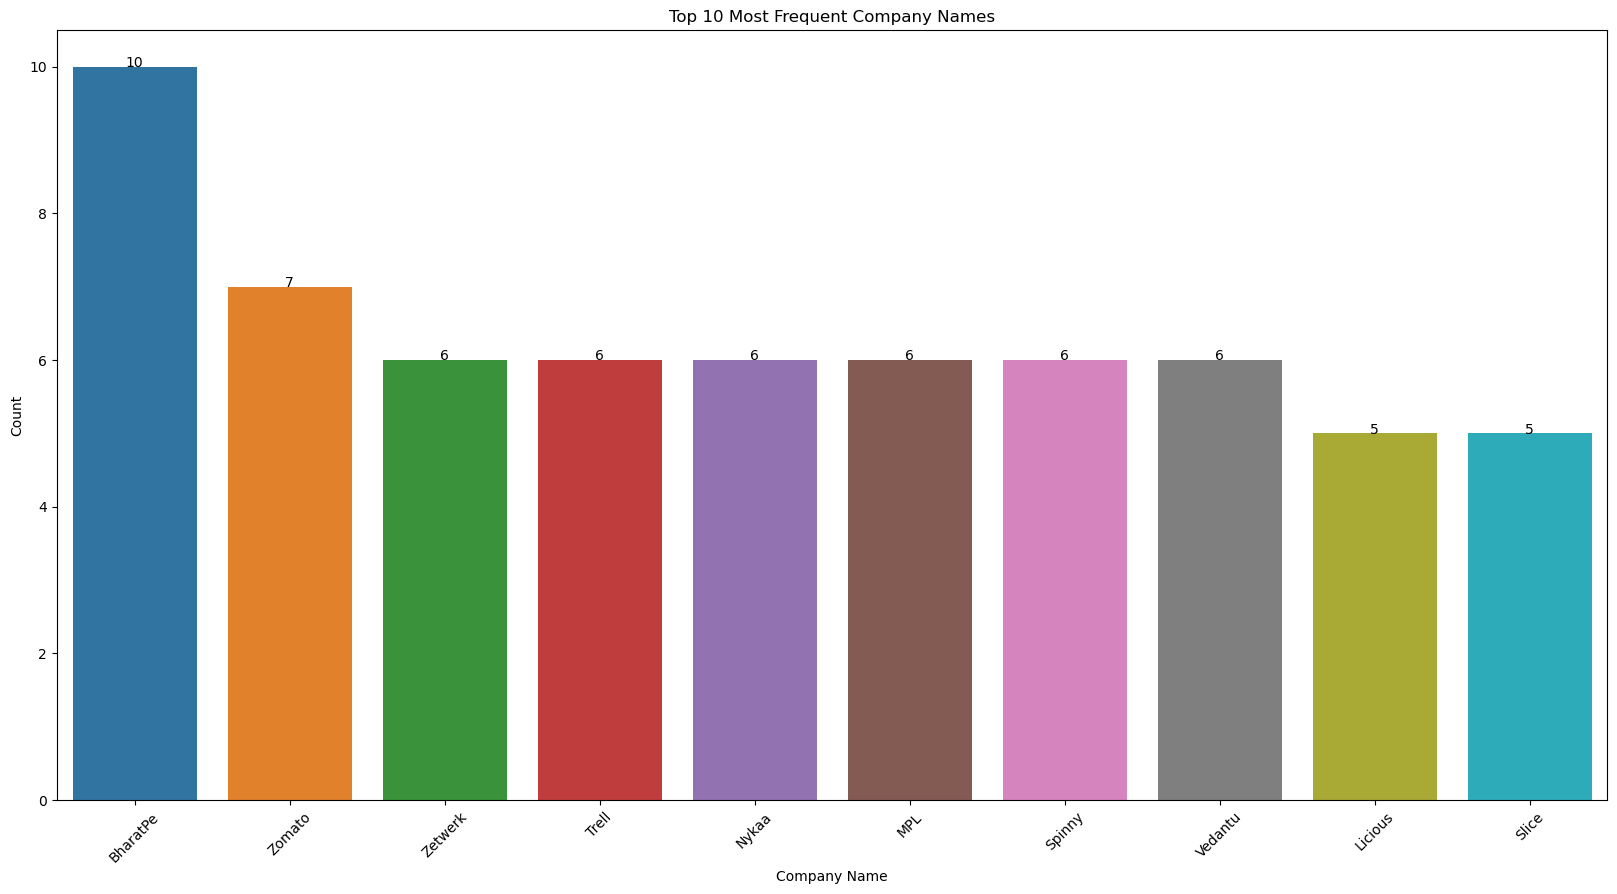

In [189]:
# Invoke the plot_top_values() function on the column named 'Company Name' for its top 10 occuring companies

plot_top_values(df, 'Company Name', n=10)

It is conspicously outlined from the visualisation that, **BharatPe** tops Indian start-ups in obtaining fundings multiple times across the years under review.

**Zomato** then came as the second most frequently funded company across the years. Meanwhile, **Nykaa**, **Trell**, **Spinny**, **Vedantu**, **Zetwerk** and **MPL** obtained funding 6 times from 2018 through 2021. 

**Unacademy** and **BYJU**'S did obtain funding 5 times across the years under review.

#### **Sector**

Let's first get informed about some statistical attributes of the sector column

In [190]:
# Get the statistical summary for the global_sector column as we have recategorised the sectors in that column.

df['global_sector'].describe()

count                   2839
unique                    48
top       Financial Services
freq                     361
Name: global_sector, dtype: object

The recategorized sector column has a total of 2839 rows with 48 unique sectors. '**Financial Services**' occurred most at 361 times. 

This indicates that, the financial services sector is the most dorminant in the Indian start-up ecosystem for the period under review.

Let's get the visual impressions about these sectors and their distribution.

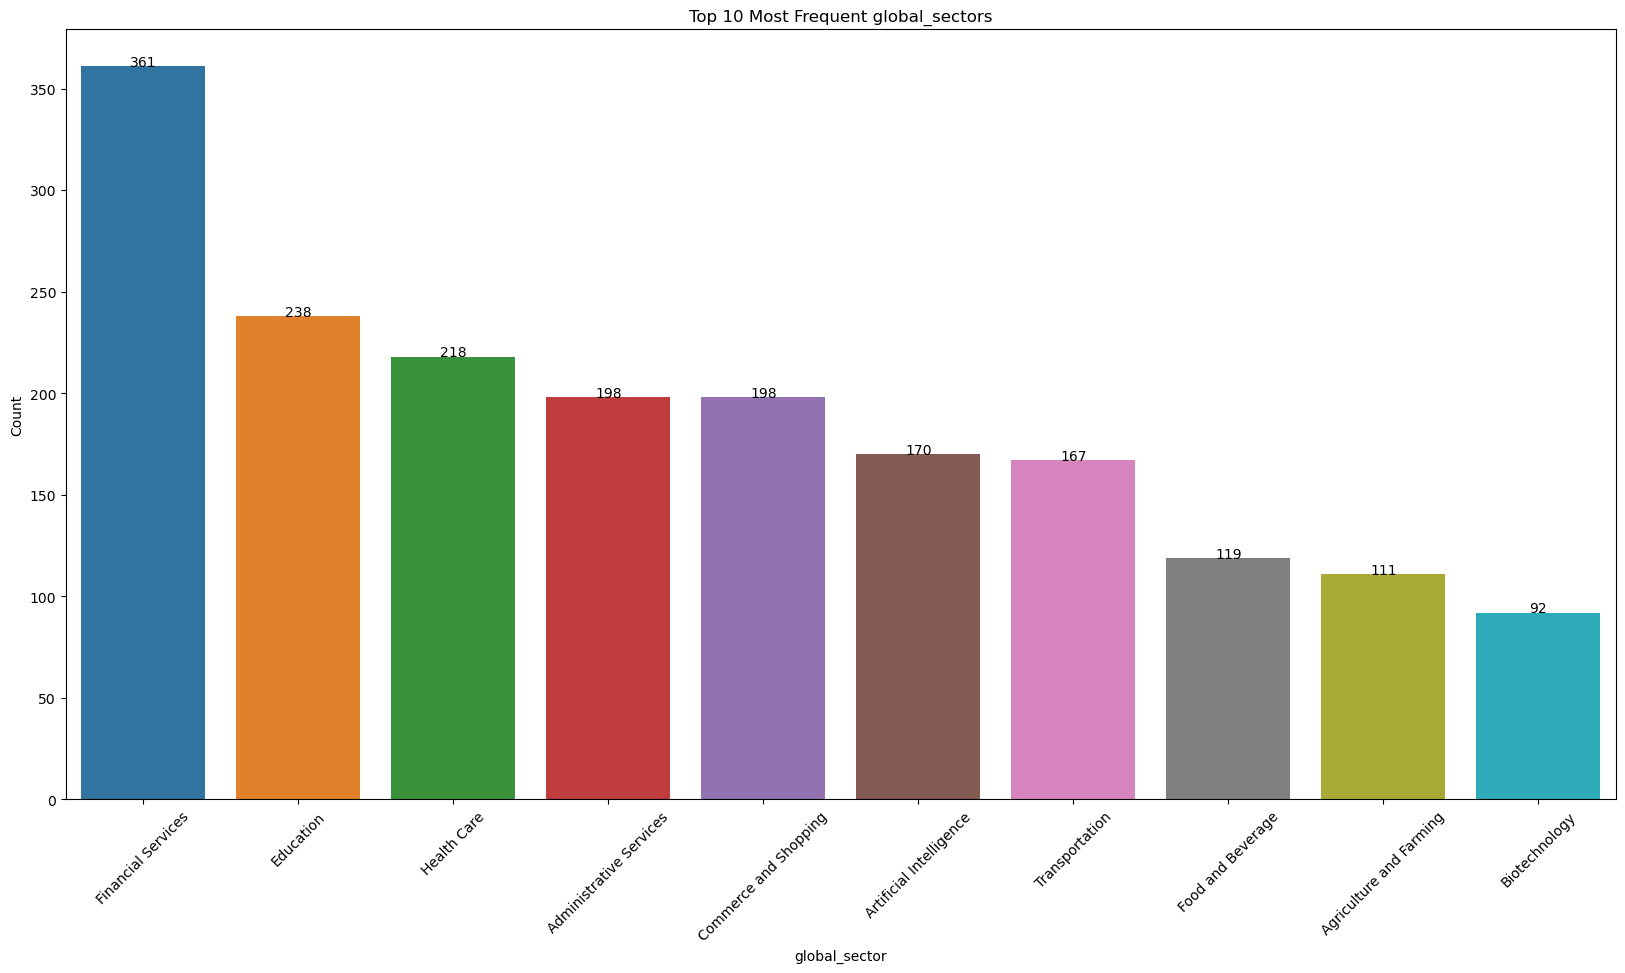

In [191]:
# Get the top ten sectors interms of multiple funding for the period by invoking the plot_top_values() function.

plot_top_values(df, 'global_sector', n=10)

As clearly indicated by the diagram above, the most frequent sector in the Indian start-up ecosystem is the **Finance Sector**.<br>

This sector obtained 361 successful fundings throughout the period. This was followed by the **Education Sector** with 238 deals.<br> 

The third most frequent sector involved in funding was the **Health Care** sector. This sector succeded in 218 funding deals over the years of 2018 through to 2021. <br>

Meanwhile the **Administrative Services** and **Commerce and Shopping** sectors obtained 198 funding deals over the period. <br>

The rest of the sectors noted for securing high number of funding deals were Artificial Intelligence, Transportaion, Food and Beverages, Agriculture and Farming and Biotechnology. They secured 170, 167, 119, 111 and 92 respectively.                             

### **Stage**

Here, we analyse the stage column as a separate variable

In [192]:
# Get some statistical summaries about the  stage column.

df.Stage.describe()

count         2839
unique          40
top       Series B
freq           525
Name: Stage, dtype: object

It appears the **Series B** funding stage was the most common funding stage at which Indian start-ups obtained funding. <br>It dorminated with 525 funding deals over the period of 2018 to 2021.

Let's get the visual impressions about these stages and their distribution per counts.

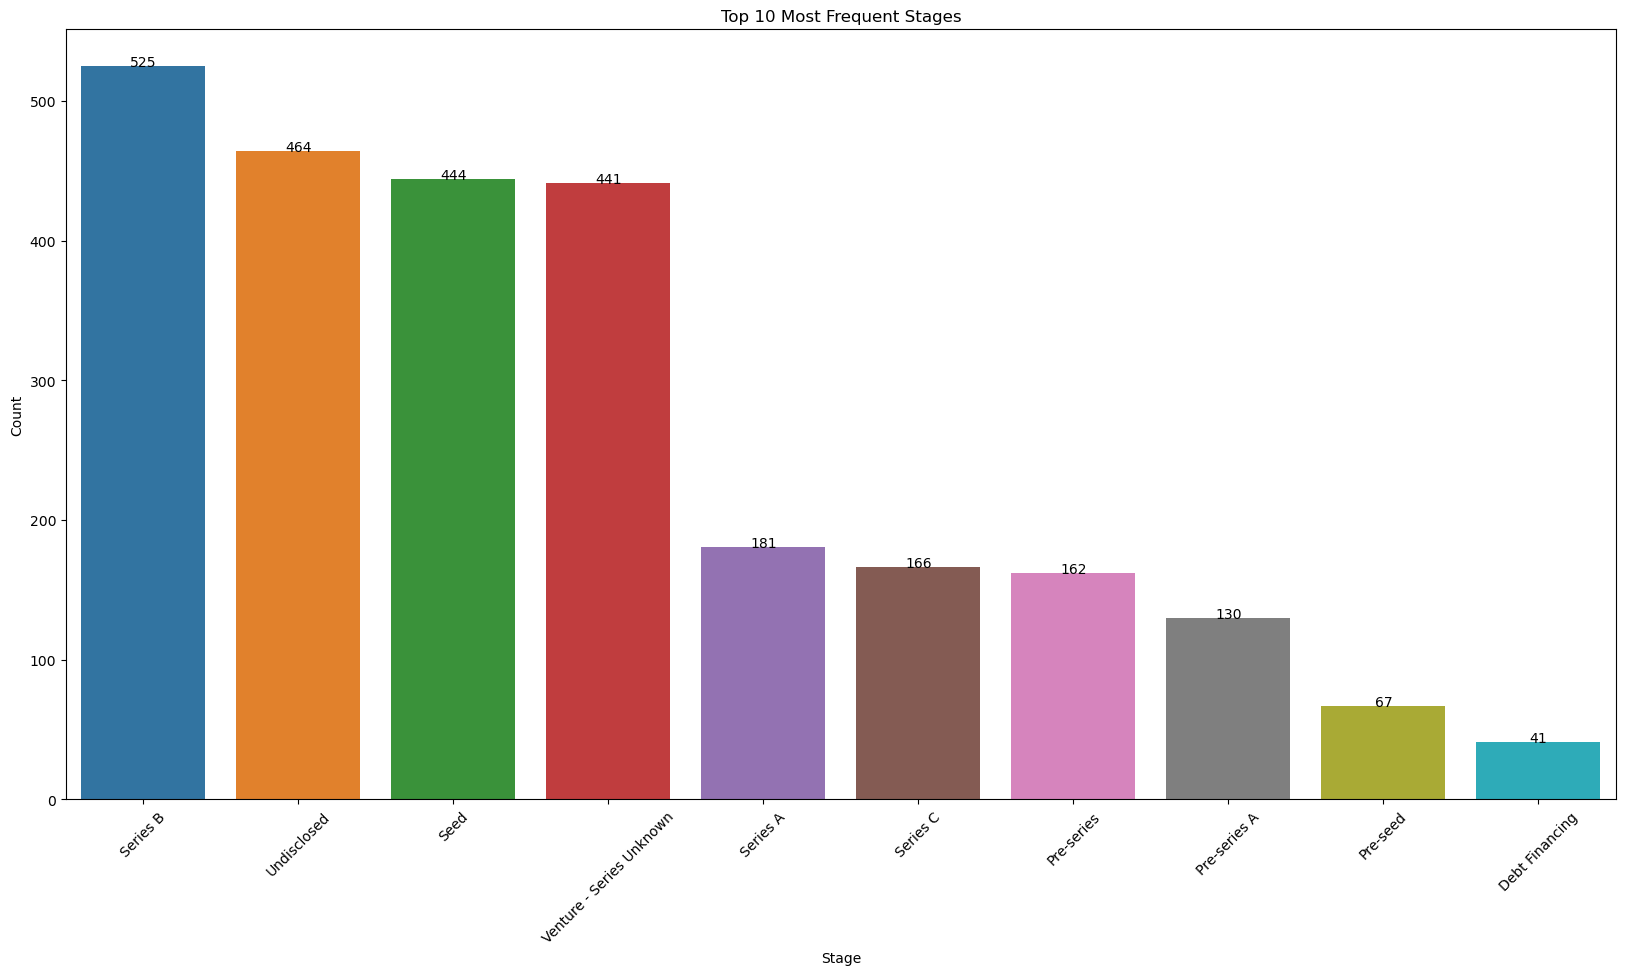

In [193]:
# Get the top ten stages interms of multiple funding for the period by invoking the plot_top_values() function.

plot_top_values(df, 'Stage', n=10)

The diagram above depicts the fact that most funded stage in the Indian start-up funding ecosystem is the **Series B stage**. 361 successful fundings were obtained at this stage throughout the period. 

However, the number of start-ups in the said ecosystem whose funding stages were not disclosed are just 61 short of that of the top funded stage. 

Also, the third most stage at which funding was obtained among these said start-ups is the  **Seed** stage. Fundings were obtained at 444 times at this stage over the years of 2018 through to 2021. 

Meanwhile at the venture equity stage whose series are unknown, 441 funding deals were obtained then a drastic drop in number of deals occured with Series A, Series C, Pre-series, Pre-seed and the last for the top ten have been at the debt financing stage.  

### **MULTIVARIATE ANALYSIS**

This form of exploratory data analysis seeks to find relationships among the numeric variables. Correlation heatmap is used in this regard.

Plotting the correlation heatmap for the **Amount**, **Year Funded** and **Founded** columns.

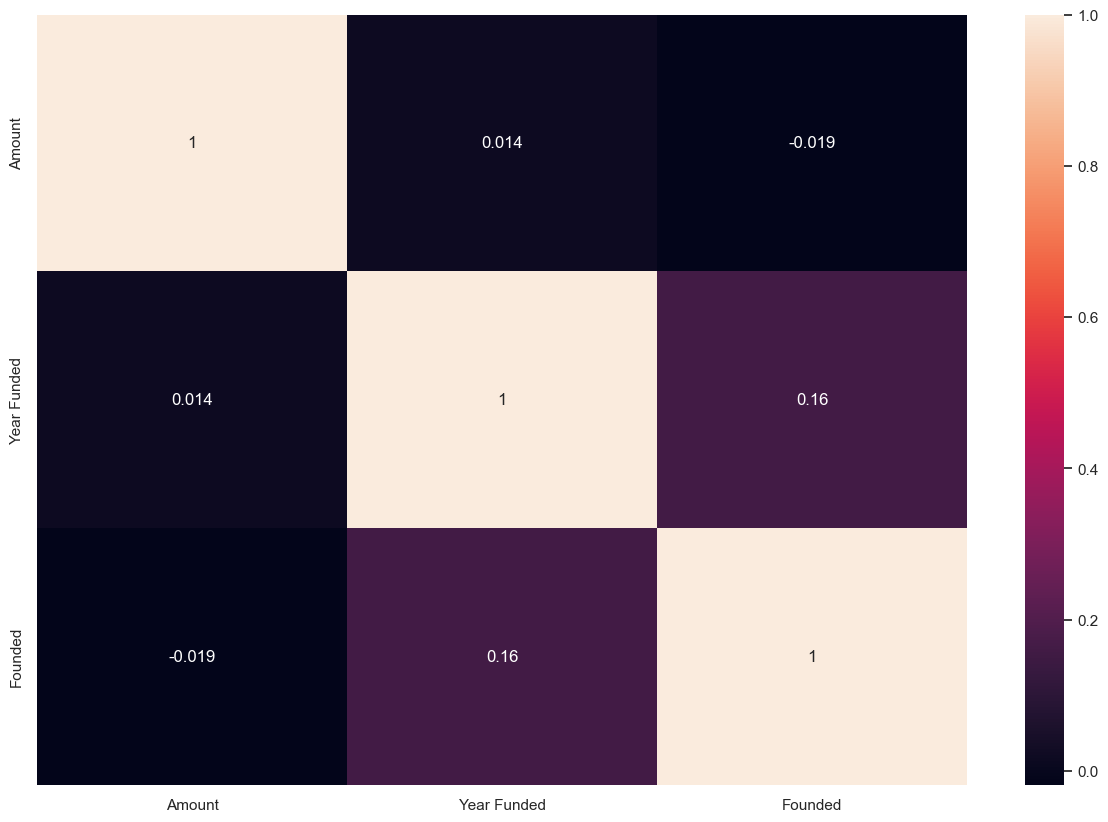

In [194]:
#Inspecting correlation visually
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True);

From our correlation heatmap, there seem to be a very weak positive relationship between the year funded and funding amount received.

For founding years of companies and funding obtained, there exits a weak negative relationship.

This implies that, amount funded does not depend on the particular year in which funding was received. Also, it does not rely on the age of such companies.

## Answering the formulated 5 SMART questions:

### Question 1 
#### What is the overall trend in funding received by start ups in India from 2018-2021

In this, we visualize the total funding against the years.


(2017.0, 2022.0)

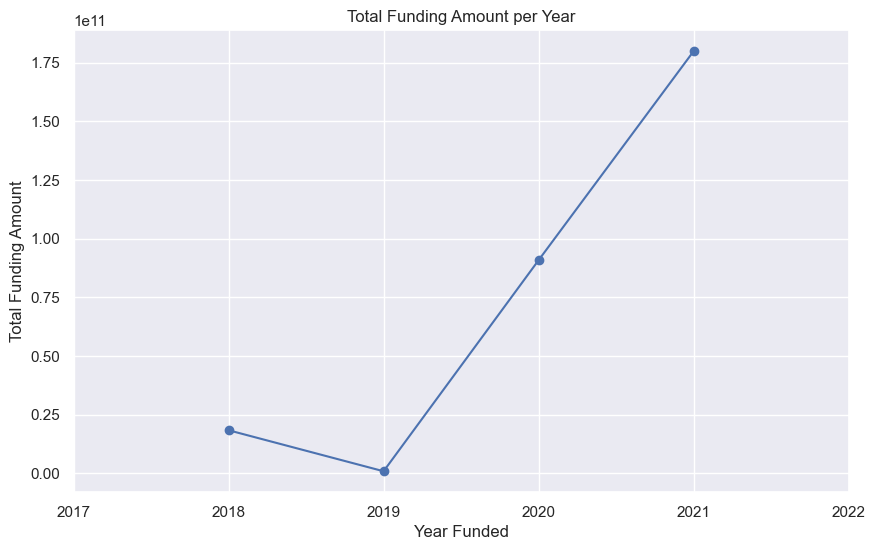

In [195]:
# Calculate the total funding for each year
total_funding_per_year = df.groupby('Year Funded')['Amount'].sum()


# Extract the years and mean funding data for plotting
years = total_funding_per_year.index
total_funding = total_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, total_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding Amount per Year')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding

* For the period 2018 -2019, there was a downward trend in the amount of money funded into startups.
* From 2019 , the money funded has steadily increased.

### **Question 2**
#### Which industries or sectors have received the highest funding during this period?
We analyze this in terms of the total funding(sum) 

In [196]:
# Group by 'Sector' and calculate total funding for each sector
total_funding_per_sector = df.groupby('global_sector')['Amount'].sum()
# Sort sectors based on total funding in descending order
sorted_sectors = total_funding_per_sector.sort_values(ascending=False)

# Get the top 5 sectors
top_10_sectors_overall = sorted_sectors.head(10)

# Create a table to display the top 5 sectors based on total funding
table = PrettyTable()
table.field_names = ['Sector', 'Total Funding']

for sector, funding in top_10_sectors_overall.items():
    table.add_row([sector, f"${funding:,.2f}"])

print(table)

+-------------------------+---------------------+
|          Sector         |    Total Funding    |
+-------------------------+---------------------+
|    Financial Services   | $160,091,671,228.00 |
|  Commerce and Shopping  |  $75,164,731,500.00 |
| Administrative Services |  $9,342,809,900.00  |
|        Education        |  $5,387,980,330.00  |
|      Transportation     |  $4,758,721,306.00  |
|    Food and Beverage    |  $4,168,920,800.00  |
| Science and Engineering |  $3,264,110,000.00  |
|       Health Care       |  $2,792,024,545.00  |
|                         |  $2,740,085,600.00  |
|          Gaming         |  $1,816,350,000.00  |
+-------------------------+---------------------+


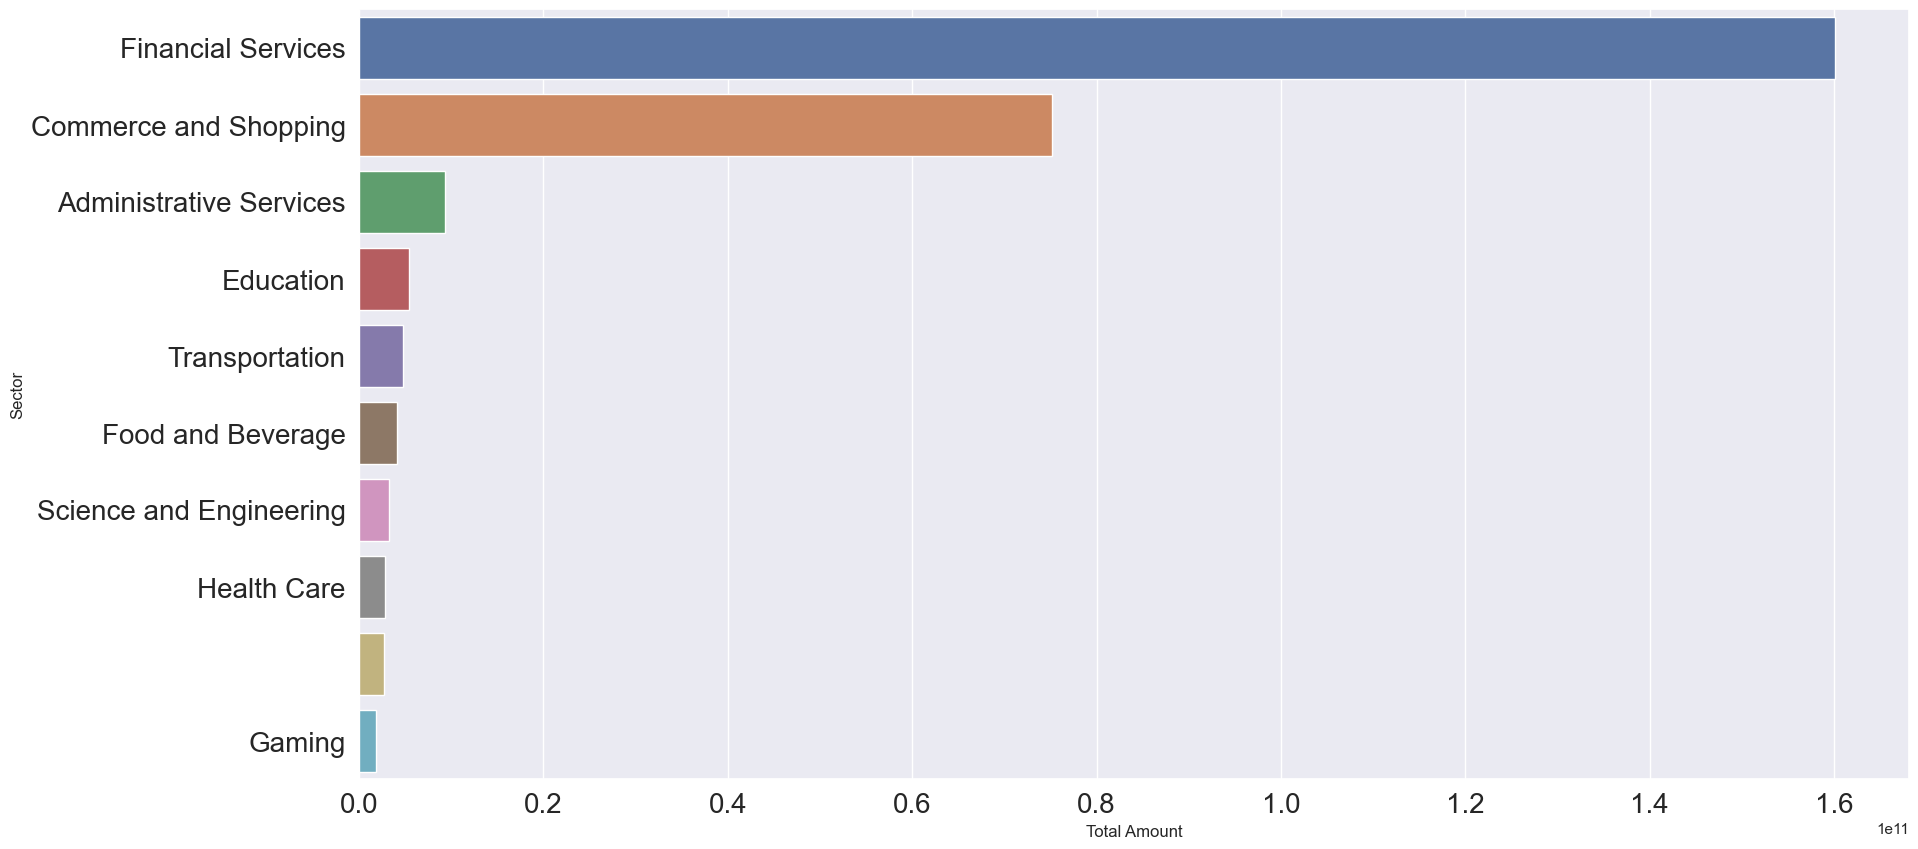

In [215]:
# top 8 sectors
top_10 = pd.DataFrame(df.groupby('global_sector')['Amount'].sum().nlargest(10)).reset_index()
top_10.columns = ['Sector', 'Total Amount']
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10, x='Total Amount', y= 'Sector',orient="h")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

From the graph above,```Financial Services``` is the highest funded sector which is then followed by ```Commerce and Shopping``` and   ```Administrative Services```.

### Question 3
#### What is the distribution of startups across the cities in India?


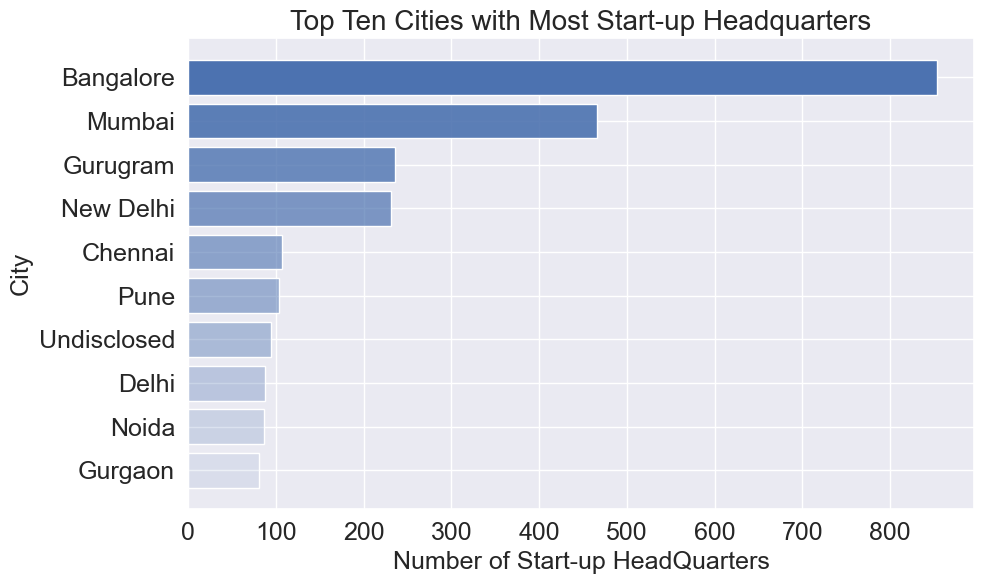

In [237]:
# Construct a histogram to visualize the number of startups in each headquarters
startup_count_per_hq = df.groupby('HeadQuarter').size().reset_index(name='Startup Count')

# Sort the DataFrame by 'Startup Count' in descending order
startup_count_per_hq_sorted = startup_count_per_hq.sort_values(by='Startup Count', ascending=False)
startup_count_per_hq_sorted=startup_count_per_hq_sorted.head(10)[::-1]
# Construct a histogram to visualize the number of startups in each headquarters
# Define custom colors for each bar
custom_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.1),\
     (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.2),\
         (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.3),\
             (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.4), \
                (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.5), \
                    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.6), \
                        (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.7), \
                            (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.8),\
                                 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.9), \
                                    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1.0)]

# Create the bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.barh(startup_count_per_hq_sorted['HeadQuarter'], startup_count_per_hq_sorted['Startup Count'], color=custom_colors)

# Add labels and title
plt.xlabel('Number of Start-up HeadQuarters', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.title('Top Ten Cities with Most Start-up Headquarters', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Display the plot
plt.show()


Most startups have their HeadQuarter in ```Bangalore``` city which is located in the Indian State of Karnataka followed by ```Mumbai``` city then ```Gurugram``` city and ```New Delhi``` city.

## Question 4

### What is the average funding amount received by start-ups in India during this period?

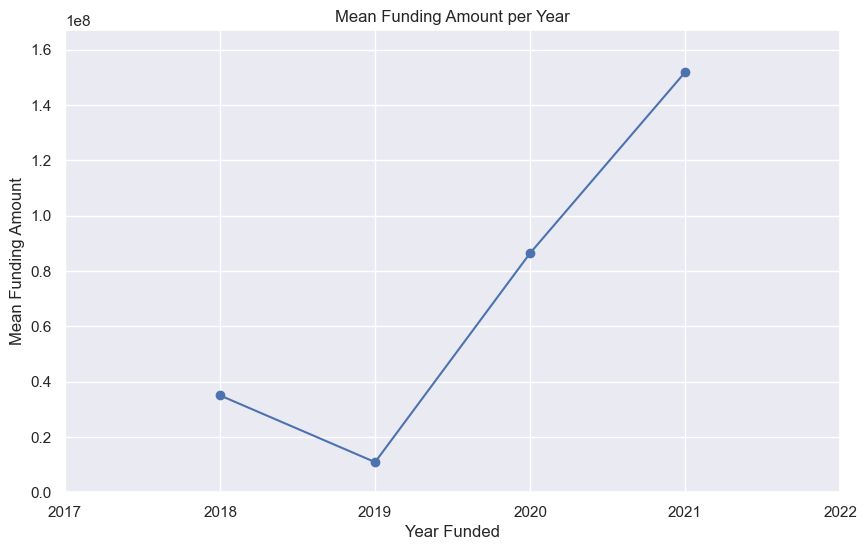

In [218]:
# Calculate the mean funding for each year
mean_funding_per_year = df.groupby('Year Funded')['Amount'].mean()

# Extract the years and mean funding data for plotting
years = mean_funding_per_year.index
mean_funding = mean_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, mean_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Mean Funding Amount')
plt.title('Mean Funding Amount per Year')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding
plt.ylim(0, max(mean_funding) * 1.1)  # Set the y-axis limits with some padding

# Show the plot
plt.show()


For the period 2018 -2019 , there was a downward trajectory in the average money funded in startups but from 2019 there was a steady increase in the average money funded.

## Question 5

### Top 5 Investors in terms of number of start-ups funded

<Axes: xlabel='Startup Count', ylabel='Investor'>

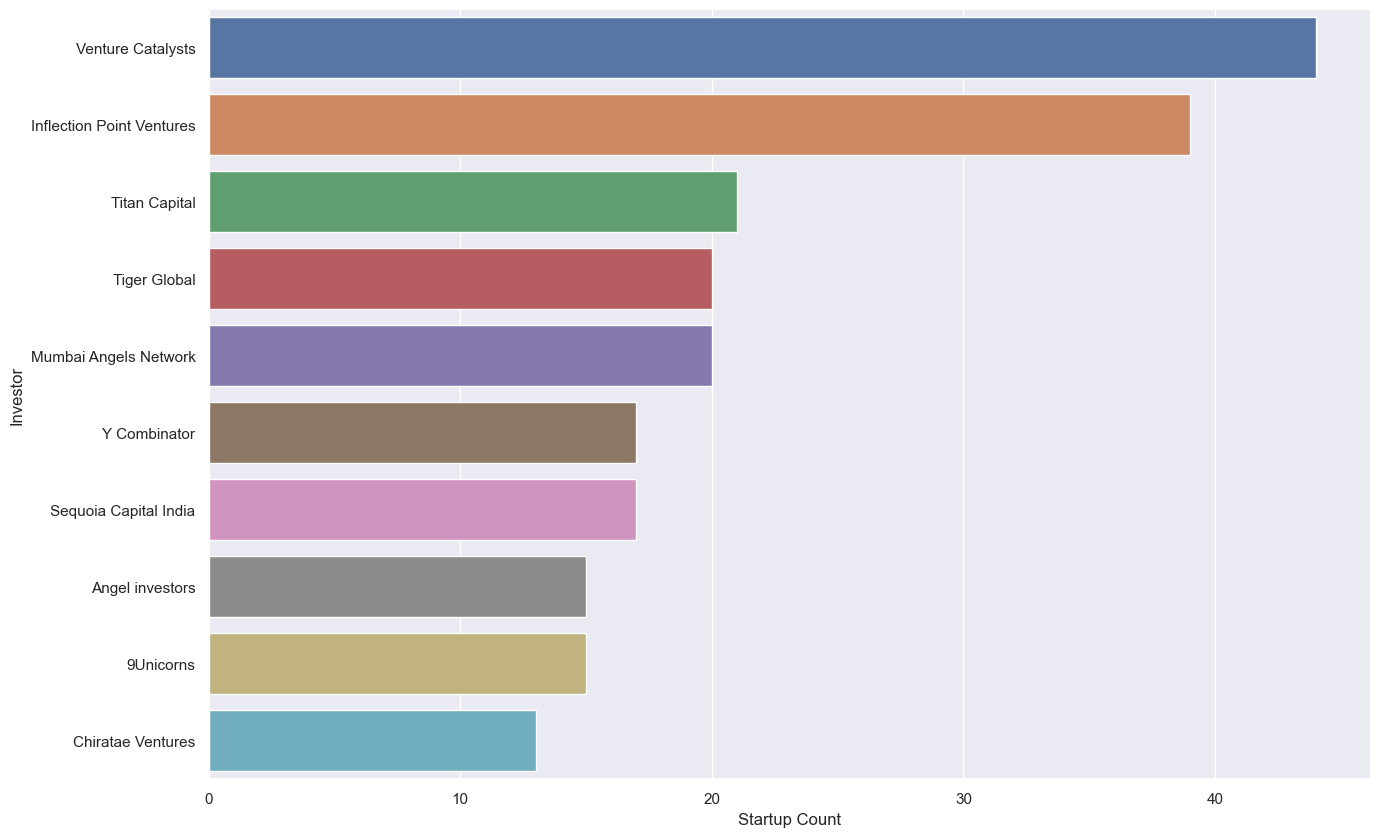

In [219]:
# Filter out rows with 'unknown' or 'undisclosed' in the 'Investor' column
df_filtered = df[~df['Investor'].isin(['unknown', 'undisclosed', 'Unknown', 'Undisclosed'])]

# investors and the number of startups funded
investors_summary = df_filtered.groupby('Investor').size().reset_index(name='Startup Count')
investors_summary=investors_summary.sort_values(by='Startup Count',ascending=False)
investors_summary=investors_summary.head(10)
sns.barplot(data=investors_summary, x='Startup Count', y='Investor',orient="h")


* For most startups, their investors were either Unknown or Undisclosed.
* The leading investor that had invested in most startups was ```Venture Catalysts``` which was closely followed by ```Inflection Point Ventures```


## Question 6

### Top 5 Investors in terms of average amount funded to startups

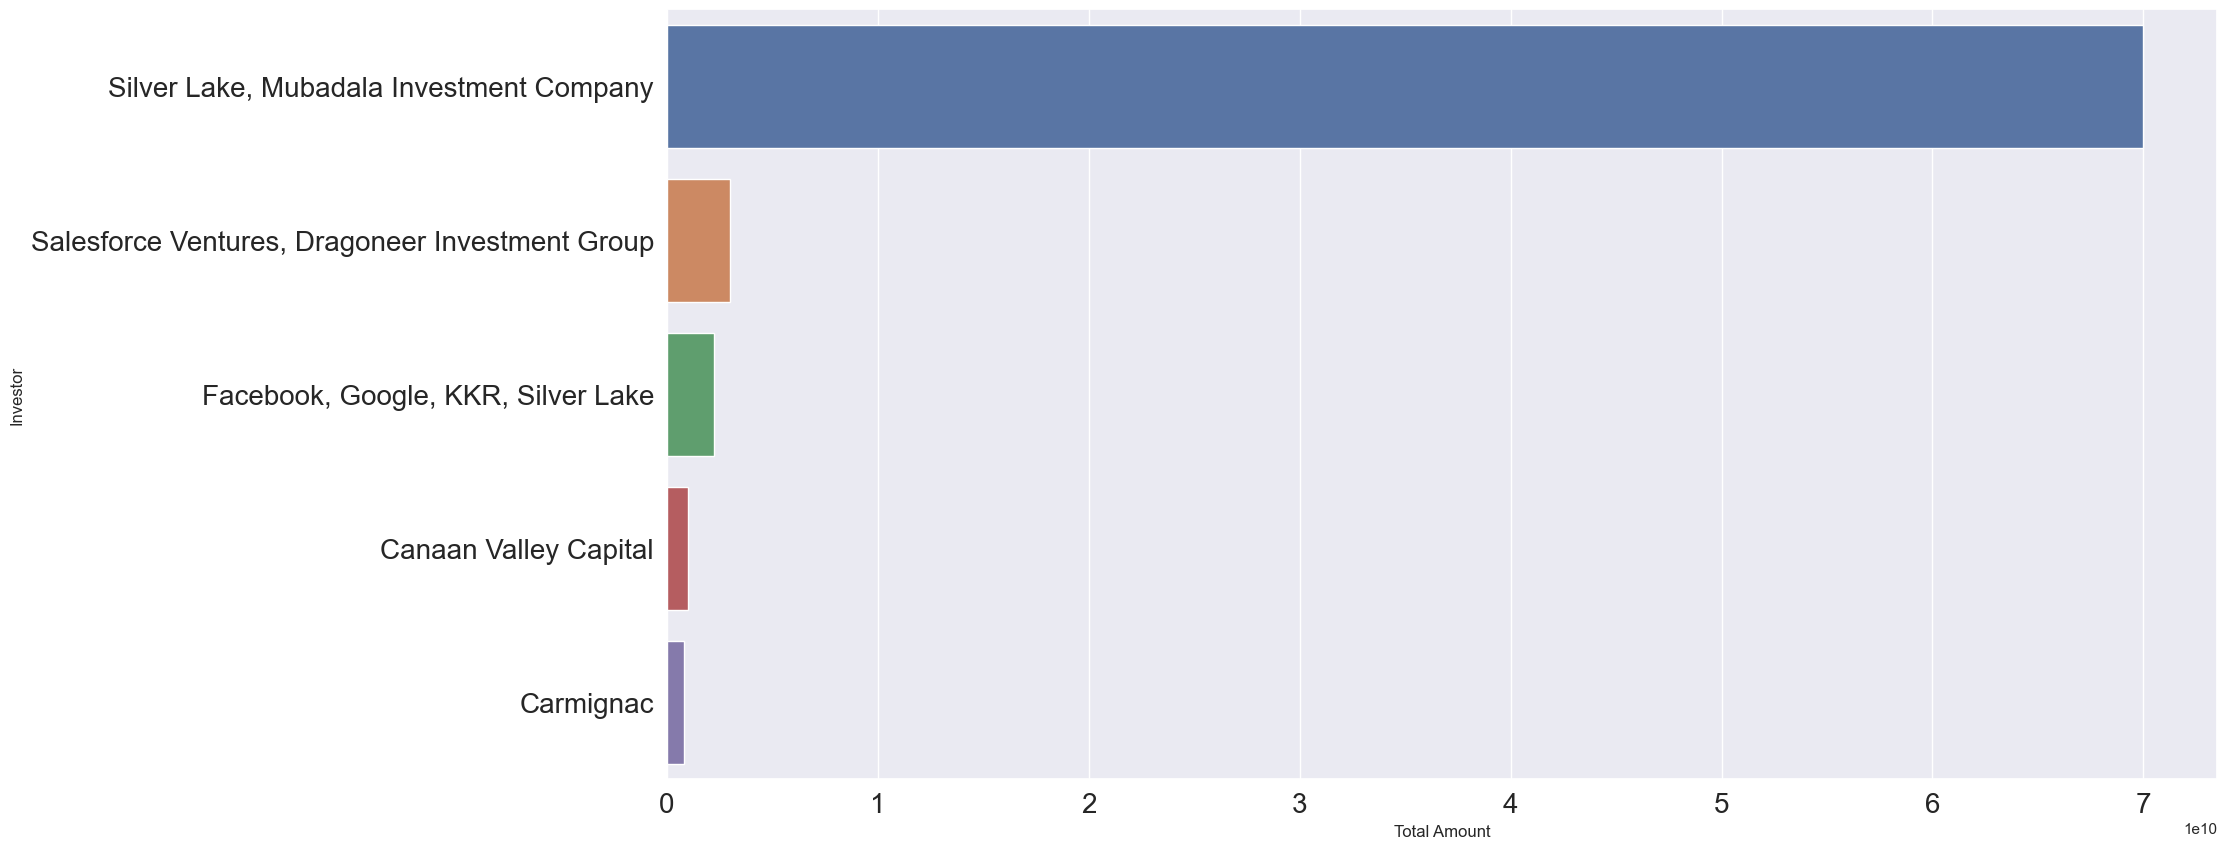

In [220]:
top_5 = pd.DataFrame(df.groupby('Investor')['Amount'].mean().nlargest(5)).reset_index()
top_5.columns = ['Investor', 'Total Amount']
plt.figure(figsize=(20, 10))
sns.barplot(data=top_5, x='Total Amount', y= 'Investor',orient="h")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [221]:
top_5

,Investor,Total Amount
0,"Silver Lake, Mubadala Investment Company",70000000000.0
1,"Salesforce Ventures, Dragoneer Investment Group",3000000000.0
2,"Facebook, Google, KKR, Silver Lake",2200000000.0
3,Canaan Valley Capital,1000000000.0
4,Carmignac,800000000.0


```Silver Lake, Mubadala Investment Company``` is the leading investor that funds the highest average  amount into startups.

## Question 7

### At What Stages were Most Start-ups Funded?

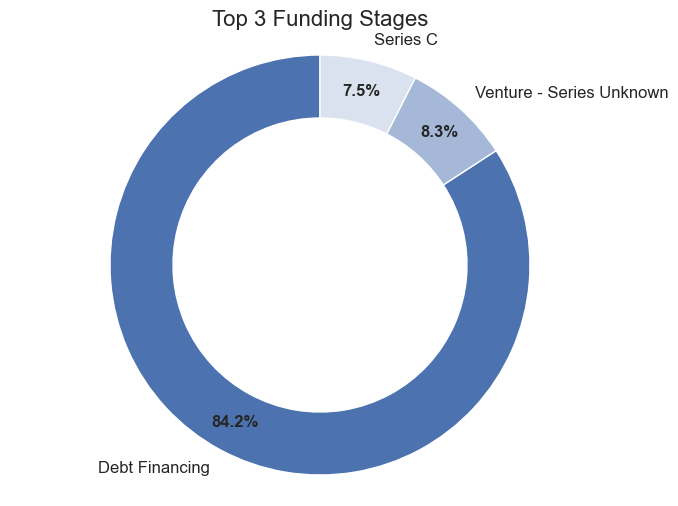

In [234]:
df_filtered_stages = df[~df['Stage'].isin(['Undisclosed'])]
df_filtered_stages = df_filtered_stages.groupby(['Stage'])['Amount'].sum().nlargest(3)
labels = df_filtered_stages.index
sizes = df_filtered_stages.values

# Create the doughnut pie chart
plt.figure(figsize=(8, 6))
outer_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1.0),\
     (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.5),\
         (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.2)]
inner_colors = ['white']
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                   colors=outer_colors, wedgeprops=dict(width=0.3), pctdistance=0.85)

# Add a circle at the center to create a doughnut shape
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust text properties
plt.setp(autotexts, size=12, weight='bold')
plt.setp(texts, size=12)

# Add a title
plt.title('Top 3 Funding Stages', fontsize=16)

# Display the plot
plt.axis('equal')
plt.show()


## Question 8

### Which 5 Cities Recorded Most Funding?

In [258]:
city_funding = df.groupby('HeadQuarter')['Amount'].sum().nlargest(5)
city_funding_billion = city_funding / 1e9
city_funding_billion

HeadQuarter
Mumbai          233.4
Bangalore        24.1
New Delhi         5.6
Gurugram          5.0
Outside India     4.4
Name: Amount, dtype: float64

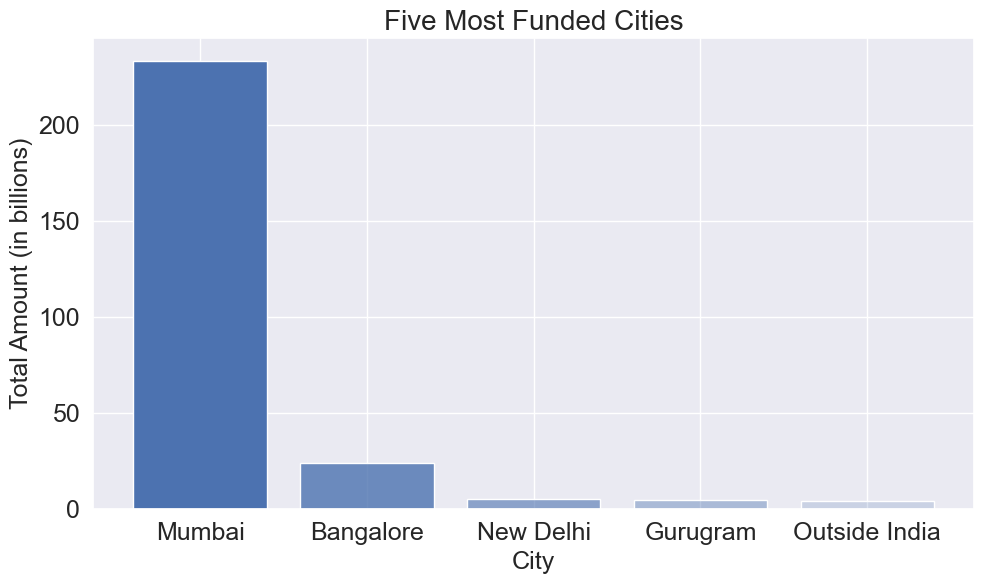

In [265]:
# Construct a histogram to visualize the number of startups in each headquarters
city_funding = df.groupby('HeadQuarter')['Amount'].sum().nlargest(5)
city_funding_billion = city_funding / 1e9

# Construct a histogram to visualize the number of startups in each headquarters
# Define custom colors for each bar
custom_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1.0),\
     (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.8),\
         (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.6),\
          (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.4),\
            (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.2) ]

# Create the bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.bar(city_funding.index, city_funding_billion, color=custom_colors)

# Add labels and title
plt.xlabel('City', fontsize=18)
plt.ylabel('Total Amount (in billions)', fontsize=18)
plt.title('Five Most Funded Cities', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Display the plot
plt.show()